In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
def get_scrape_divs(game_id):
    url = "http://www.espn.com/college-football/playbyplay?gameId={}".format(
        game_id)
    
    response = requests.get(url)
    c = response.content
    soup = BeautifulSoup(c, 'html.parser')
    divs = soup.find_all('div', { "class": "content" })
    return divs

In [4]:
gameId = 401013155

In [5]:
divs = get_scrape_divs(gameId)

In [6]:
divs

[<div class="content"><div id="gamepackage-drives-wrap"><ul class="css-accordion"><li class="accordion-item"><div class="accordion-header"><a aria-controls="gp-playbyplay-4010130331" aria-expanded="true" class=" webview-internal" data-toggle="collapse" href="#gp-playbyplay-4010130331" role="button"><div class="left"><span class="home-logo"><img class="team-logo" src="http://a.espncdn.com/combiner/i?img=/i/teamlogos/ncaa/500/277.png&amp;h=100&amp;w=100"/></span><span class="drives"><span class="headline">Touchdown</span><span class="drive-details">3 plays, 75 yards, 0:50</span></span></div><div class="right"><span class="home"><span class="team-name">BAY</span><span class="team-score">0</span></span><span class="away"><span class="team-name">WVU</span><span class="team-score">7</span></span></div></a></div><div class="accordion-content collapse in" id="gp-playbyplay-4010130331"><div class="content"><ul class="drive-list">
 <li class="">
 <h3></h3>
 <p>
 <span class="post-play">
 							

In [14]:
pp = divs[0].find_all("span", {"class": "post-play"})

In [8]:
len(divs)

32

In [12]:
divs[1]

<div class="content"><ul class="drive-list">
<li class="">
<h3></h3>
<p>
<span class="post-play">
							(15:00 - 1st) Drew Galitz kickoff for 65 yds for a touchback
						</span>
</p>
</li>
<li class="">
<h3>1st &amp; 10 at WVU 25</h3>
<p>
<span class="post-play">
							(14:47 - 1st) Will Grier pass complete to David Sills V for 9 yds to the WVirg 34
						</span>
</p>
</li>
<li class="">
<h3>2nd &amp; 1 at WVU 34</h3>
<p>
<span class="post-play">
							(14:37 - 1st) Will Grier pass complete to Marcus Simms for 13 yds to the WVirg 47 for a 1ST down
						</span>
</p>
</li>
<li class="video">
<h3>1st &amp; 10 at WVU 47</h3>
<p>
<span class="post-play">
							(14:10 - 1st) Will Grier pass complete to Gary Jennings Jr. for 53 yds for a TD, (Evan Staley KICK)
						</span>
</p>
<a class="module_bloom_behavior gamepackage_bloom" data-behavior="module_bloom" data-id="25084182" href="#"><figure class="iframe-video article-figure video " data-cerebro-id="5bd24de0ca84b719bb05c9c3" data-sour

In [38]:
[p.get_text().strip() for p in pp]

['(15:00 - 1st) Drew Galitz kickoff for 65 yds for a touchback',
 '(14:47 - 1st) Will Grier pass complete to David Sills V for 9 yds to the WVirg 34',
 '(14:37 - 1st) Will Grier pass complete to Marcus Simms for 13 yds to the WVirg 47 for a 1ST down',
 '(14:10 - 1st) Will Grier pass complete to Gary Jennings Jr. for 53 yds for a TD, (Evan Staley KICK)',
 '(14:10 - 1st) Evan Staley kickoff for 65 yds for a touchback',
 '(13:50 - 1st) Charlie Brewer run for 2 yds to the Bayl 27',
 '(13:37 - 1st) Charlie Brewer pass incomplete to Denzel Mims',
 '(13:31 - 1st) Charlie Brewer pass incomplete to Denzel Mims',
 '(13:22 - 1st) Drew Galitz punt for 43 yds, fair catch by Marcus Simms at the WVirg 30',
 '(13:02 - 1st) WEST VIRGINIA Penalty, Offensive Holding (-10 Yards) to the WVirg 20',
 '(12:37 - 1st) Will Grier pass complete to Gary Jennings Jr. for 11 yds to the WVirg 31',
 '(12:17 - 1st) Will Grier pass incomplete to T.J. Simmons',
 '(12:17 - 1st) Timeout BAYLOR, clock 12:17',
 '(11:57 - 1st

In [44]:
downs = [d.text for d in divs[0].find_all("h3")]

In [48]:
[ d.get_text() for d in divs[0].find_all('span', {"class": "drive-details"})]

['3 plays, 75 yards, 0:50',
 '3 plays, 2 yards, 0:48',
 '9 plays, 43 yards, 4:47',
 '3 plays, 17 yards, 1:04',
 '7 plays, 32 yards, 1:41',
 '4 plays, 23 yards, 1:39',
 '5 plays, 25 yards, 1:25',
 '4 plays, 11 yards, 2:21',
 '7 plays, 41 yards, 2:11',
 '3 plays, -10 yards, 1:56',
 '6 plays, 52 yards, 3:02',
 '3 plays, -3 yards, 1:10',
 '2 plays, 67 yards, 0:33',
 '1 play, 0 yards, 0:15',
 '2 plays, 33 yards, 0:14',
 '5 plays, 23 yards, 2:14',
 '2 plays, 80 yards, 0:48',
 '5 plays, 14 yards, 2:32',
 '1 play, -1 yard, 0:37',
 '4 plays, 0 yards, 0:40',
 '9 plays, 56 yards, 4:28',
 '10 plays, 72 yards, 4:18',
 '10 plays, 75 yards, 5:11',
 '2 plays, 34 yards, 0:30',
 '7 plays, 47 yards, 3:21',
 '3 plays, 4 yards, 2:18',
 '3 plays, 2 yards, 2:24',
 '3 plays, 4 yards, 2:24',
 '5 plays, 29 yards, 2:34',
 '3 plays, 2 yards, 1:52']

In [50]:
downs

['',
 '1st & 10 at WVU 25',
 '2nd & 1 at WVU 34',
 '1st & 10 at WVU 47',
 '',
 '1st & 10 at BAY 25',
 '2nd & 8 at BAY 27',
 '3rd & 8 at BAY 27',
 '4th & 8 at BAY 27',
 '1st & 10 at WVU 30',
 '1st & 20 at WVU 20',
 '2nd & 9 at WVU 31',
 '',
 '3rd & 9 at WVU 31',
 '1st & 10 at WVU 43',
 '2nd & 6 at WVU 47',
 '3rd & 4 at WVU 49',
 '1st & 10 at BAY 46',
 '1st & 10 at BAY 34',
 '2nd & 10 at BAY 34',
 '3rd & 3 at BAY 27',
 '4th & 3 at BAY 27',
 '1st & 10 at BAY 27',
 '1st & 10 at BAY 39',
 '2nd & 5 at BAY 44',
 '1st & 10 at WVU 45',
 '1st & 10 at BAY 38',
 '2nd & 10 at BAY 38',
 '1st & 10 at BAY 25',
 '2nd & 10 at BAY 25',
 '3rd & 8 at BAY 23',
 '4th & 8 at BAY 23',
 '1st & 10 at BAY 23',
 '2nd & 10 at BAY 23',
 '3rd & 9 at BAY 24',
 '1st & 10 at BAY 23',
 '1st & 10 at BAY 33',
 '1st & Goal at BAY 10',
 '2nd & Goal at BAY 10',
 '3rd & Goal at BAY 8',
 '4th & Goal at BAY 8',
 '',
 '1st & 10 at BAY 25',
 '1st & 10 at BAY 39',
 '2nd & 7 at BAY 42',
 '3rd & 7 at BAY 42',
 '4th & 13 at BAY 36',
 

In [63]:
divs[0].find_all("div", {"class": "accordion-header"})

[<div class="accordion-header"><a aria-controls="gp-playbyplay-4010130331" aria-expanded="true" class=" webview-internal" data-toggle="collapse" href="#gp-playbyplay-4010130331" role="button"><div class="left"><span class="home-logo"><img class="team-logo" src="http://a.espncdn.com/combiner/i?img=/i/teamlogos/ncaa/500/277.png&amp;h=100&amp;w=100"/></span><span class="drives"><span class="headline">Touchdown</span><span class="drive-details">3 plays, 75 yards, 0:50</span></span></div><div class="right"><span class="home"><span class="team-name">BAY</span><span class="team-score">0</span></span><span class="away"><span class="team-name">WVU</span><span class="team-score">7</span></span></div></a></div>,
 <div class="accordion-header"><a aria-controls="gp-playbyplay-4010130332" aria-expanded="false" class="collapsed webview-internal" data-toggle="collapse" href="#gp-playbyplay-4010130332" role="button"><div class="left"><span class="home-logo"><img class="team-logo" src="http://a.espncdn.

In [64]:
response = requests.get('http://cdn.espn.com/core/college-football/playbyplay?gameId=401013033&xhr=1&render=false&userab=18')

In [65]:
data = response.json()

In [239]:
data.keys()

dict_keys(['customStyleSheet', 'ads', 'analytics', '__gamepackage__', 'content', 'type', 'nowFeedSupported', 'gamepackageJSON', 'gameId', 'targeting', 'meta', 'sport', 'customNav', 'tier2Nav'])

In [189]:
data['__gamepackage__']['awayTeam']['team']['abbreviation']

'BAY'

In [224]:
data['gamepackageJSON']['drives']['previous']

[{'description': '3 plays, 75 yards, 0:50',
  'displayResult': 'Touchdown',
  'end': {'clock': {'displayValue': '14:10'},
   'period': {'number': 1, 'type': 'quarter'},
   'text': 'BAY 0',
   'yardLine': 100},
  'id': '4010130331',
  'isScore': True,
  'offensivePlays': 3,
  'plays': [{'awayScore': 0,
    'clock': {'displayValue': '15:00'},
    'end': {'distance': 10,
     'down': 1,
     'downDistanceText': '1st & 10 at WVU 25',
     'possessionText': 'WVU 25',
     'shortDownDistanceText': '1st & 10',
     'team': {'id': '277'},
     'yardLine': 25,
     'yardsToEndzone': 75},
    'homeScore': 0,
    'id': '401013033101849902',
    'modified': '2018-10-26T00:25Z',
    'period': {'number': 1},
    'priority': False,
    'scoringPlay': False,
    'start': {'distance': 10,
     'down': 1,
     'team': {'id': '239'},
     'yardLine': 65,
     'yardsToEndzone': 65},
    'statYardage': 0,
    'text': 'Drew Galitz kickoff for 65 yds for a touchback',
    'type': {'abbreviation': 'K', 'id': 

In [150]:
data['plays']

KeyError: 'plays'

In [217]:
def clean_drive_data(drive_data, awayTeam, homeTeam):
    drive_list = []
    for d in drive_data:
        u_dict = {}
        home_score = "{}_score".format(homeTeam)
        away_score = "{}_score".format(awayTeam)
        u_dict[home_score] = d['homeScore']
        u_dict[away_score] = d['awayScore']
        u_dict['quarter'] = d['period']['number']
        u_dict['clock'] = d['clock']['displayValue']
        u_dict['endDown'] = d['end']['down']
        u_dict['endDistance'] = d['end']['distance']
        if 'startDownDistanceText' in d['end'].keys():
            u_dict['endDownDistanceText'] = d['end']['shortDownDistanceText']
        if 'possessionText' in d['end'].keys():
            u_dict['endPossessionText'] = d['end']['possessionText']
        u_dict['endYardLine'] = d['end']['yardLine']
        u_dict['endYardsToEndzone'] = d['end']['yardsToEndzone']
        u_dict['text'] = d['text']
        u_dict['statYardage'] = d['statYardage']
        u_dict['type_abv'] = d['type']['abbreviation']
        u_dict['type_text'] = d['type']['text']
        u_dict['startDown'] = d['start']['down']
        u_dict['startDistance'] = d['start']['distance']
        if 'shortDownDistanceText' in d['start'].keys():
            u_dict['startDownDistanceText'] = d['start']['shortDownDistanceText']
        if 'possessionText' in d['start'].keys():
            u_dict['startPossessionText'] = d['start']['possessionText']
        u_dict['startYardLine'] = d['start']['yardLine']
        u_dict['startYardsToEndzone'] = d['start']['yardsToEndzone']
        drive_list.append(u_dict)
    return drive_list

In [221]:
drive_data

[{'awayScore': 0,
  'clock': {'displayValue': '15:00'},
  'end': {'distance': 10,
   'down': 1,
   'downDistanceText': '1st & 10 at WVU 25',
   'possessionText': 'WVU 25',
   'shortDownDistanceText': '1st & 10',
   'team': {'id': '277'},
   'yardLine': 25,
   'yardsToEndzone': 75},
  'homeScore': 0,
  'id': '401013033101849902',
  'modified': '2018-10-26T00:25Z',
  'period': {'number': 1},
  'priority': False,
  'scoringPlay': False,
  'start': {'distance': 10,
   'down': 1,
   'team': {'id': '239'},
   'yardLine': 65,
   'yardsToEndzone': 65},
  'statYardage': 0,
  'text': 'Drew Galitz kickoff for 65 yds for a touchback',
  'type': {'abbreviation': 'K', 'id': '53', 'text': 'Kickoff'},
  'wallclock': '2018-10-25T23:05:32Z'},
 {'awayScore': 0,
  'clock': {'displayValue': '14:47'},
  'end': {'distance': 1,
   'down': 2,
   'downDistanceText': '2nd & 1 at WVU 34',
   'possessionText': 'WVU 34',
   'shortDownDistanceText': '2nd & 1',
   'team': {'id': '277'},
   'yardLine': 34,
   'yardsTo

In [120]:
drives[0]

NameError: name 'drives' is not defined

In [211]:
drive_data[0]

{'description': '3 plays, 75 yards, 0:50',
 'displayResult': 'Touchdown',
 'end': {'clock': {'displayValue': '14:10'},
  'period': {'number': 1, 'type': 'quarter'},
  'text': 'BAY 0',
  'yardLine': 100},
 'id': '4010130331',
 'isScore': True,
 'offensivePlays': 3,
 'plays': [{'awayScore': 0,
   'clock': {'displayValue': '15:00'},
   'end': {'distance': 10,
    'down': 1,
    'downDistanceText': '1st & 10 at WVU 25',
    'possessionText': 'WVU 25',
    'shortDownDistanceText': '1st & 10',
    'team': {'id': '277'},
    'yardLine': 25,
    'yardsToEndzone': 75},
   'homeScore': 0,
   'id': '401013033101849902',
   'modified': '2018-10-26T00:25Z',
   'period': {'number': 1},
   'priority': False,
   'scoringPlay': False,
   'start': {'distance': 10,
    'down': 1,
    'team': {'id': '239'},
    'yardLine': 65,
    'yardsToEndzone': 65},
   'statYardage': 0,
   'text': 'Drew Galitz kickoff for 65 yds for a touchback',
   'type': {'abbreviation': 'K', 'id': '53', 'text': 'Kickoff'},
   'wal

In [195]:
def get_team_data(data):
    u_dict = {}
    away = {
        "displayName": data['__gamepackage__']['awayTeam']['team']['displayName'],
        "abv": data['__gamepackage__']
                ['awayTeam']['team']['abbreviation']}
    
    home = {
        "displayName": data['__gamepackage__']['homeTeam']['team']['displayName'],
        "abv": data['__gamepackage__']
                ['homeTeam']['team']['abbreviation']}

    u_dict['awayTeam'] = away
    u_dict['homeTeam'] = home
    
    return u_dict

In [197]:
team_dict = get_team_data(data)

In [191]:
data['__gamepackage__']['awayTeam']

{'homeAway': 'away',
 'id': '239',
 'linescores': [{'displayValue': '0'},
  {'displayValue': '0'},
  {'displayValue': '14'},
  {'displayValue': '0'}],
 'order': 1,
 'possession': False,
 'record': [{'displayValue': '4-4', 'summary': '4-4', 'type': 'total'},
  {'displayValue': '1-3', 'summary': '1-3', 'type': 'road'},
  {'displayValue': '2-3', 'summary': '2-3', 'type': 'vsconf'}],
 'score': '14',
 'team': {'abbreviation': 'BAY',
  'alternateColor': 'ffb81c',
  'color': '004834',
  'displayName': 'Baylor Bears',
  'id': '239',
  'links': [{'href': 'http://www.espn.com/college-football/team/_/id/239/baylor-bears',
    'rel': ['clubhouse', 'desktop', 'team'],
    'text': 'Clubhouse'}],
  'location': 'Baylor',
  'logos': [{'alt': '',
    'height': 500,
    'href': 'http://a.espncdn.com/i/teamlogos/ncaa/500/239.png',
    'rel': ['full', 'default'],
    'width': 500},
   {'alt': '',
    'height': 500,
    'href': 'http://a.espncdn.com/i/teamlogos/ncaa/500-dark/239.png',
    'rel': ['full', 'd

In [198]:
team_dict['awayTeam']

{'abv': 'BAY', 'displayName': 'Baylor Bears'}

In [240]:
def get_json_data(game_id):
    response = requests.get(
        'http://cdn.espn.com/core/college-football/playbyplay?gameId={}&xhr=1&render=false&userab=18'.format(game_id))
    data = response.json()
    return data


def get_team_data(data):
    u_dict = {}
    away = {
        "displayName": data['__gamepackage__']['awayTeam']['team']['displayName'],
        "abv": data['__gamepackage__']
                ['awayTeam']['team']['abbreviation']}

    home = {
        "displayName": data['__gamepackage__']['homeTeam']['team']['displayName'],
        "abv": data['__gamepackage__']
                ['homeTeam']['team']['abbreviation']}

    u_dict['awayTeam'] = away
    u_dict['homeTeam'] = home

    return u_dict

def get_clean_play_data(drive_data, awayTeam, homeTeam):
    drive_list = []
    for d in drive_data:
        u_dict = {}
        home_score = "{}_score".format(homeTeam)
        away_score = "{}_score".format(awayTeam)
        u_dict[home_score] = d['homeScore']
        u_dict[away_score] = d['awayScore']
        u_dict['quarter'] = d['period']['number']
        u_dict['clock'] = d['clock']['displayValue']
        u_dict['endDown'] = d['end']['down']
        u_dict['endDistance'] = d['end']['distance']
        if 'startDownDistanceText' in d['end'].keys():
            u_dict['endDownDistanceText'] = d['end']['shortDownDistanceText']
        if 'possessionText' in d['end'].keys():
            u_dict['endPossessionText'] = d['end']['possessionText']
            u_dict['possession'] = d['end']['possessionText'].split()[0]
        u_dict['endYardLine'] = d['end']['yardLine']
        u_dict['endYardsToEndzone'] = d['end']['yardsToEndzone']
        u_dict['text'] = d['text']
        u_dict['statYardage'] = d['statYardage']
        u_dict['type_abv'] = d['type']['abbreviation']
        u_dict['type_text'] = d['type']['text']
        u_dict['startDown'] = d['start']['down']
        u_dict['startDistance'] = d['start']['distance']
        if 'shortDownDistanceText' in d['start'].keys():
            u_dict['startDownDistanceText'] = d['start']['shortDownDistanceText']
        if 'possessionText' in d['start'].keys():
            u_dict['startPossessionText'] = d['start']['possessionText']
        u_dict['startYardLine'] = d['start']['yardLine']
        u_dict['startYardsToEndzone'] = d['start']['yardsToEndzone']
        u_dict['scoringPlay'] = d['scoringPlay']
        drive_list.append(u_dict)
    return drive_list


def clean_all_drives(json, awayTeam, homeTeam):
    data = json['gamepackageJSON']
    if 'previous' in json.keys():
        drives = json['previous']
        play_by_play = []
        for d in drives:
            clean_drives = get_clean_play_data(d['plays'], awayTeam, homeTeam)
            print(clean_drives)
            play_by_play = play_by_play + clean_drives
        return play_by_play


def main(gameId):
    json_data = get_json_data(gameId)
    team_dict = get_team_data(json_data)
    all_play_by_play = clean_all_drives(json_data,
                                        team_dict['awayTeam']['abv'],
                                        team_dict['homeTeam']['abv'])
    return all_play_by_play


In [227]:
json_data = get_json_data(gameId)

In [229]:
team_dict = get_team_data(json_data)

In [230]:
team_dict

{'awayTeam': {'abv': 'BAY', 'displayName': 'Baylor Bears'},
 'homeTeam': {'abv': 'WVU', 'displayName': 'West Virginia Mountaineers'}}

In [231]:
team_dict['awayTeam']['abv']

'BAY'

In [241]:
all_play_by_play = clean_all_drives(json_data,
                                        team_dict['awayTeam']['abv'],
                                        team_dict['homeTeam']['abv'])

In [242]:
all_play_by_play

In [263]:
json_data['gamepackageJSON']['drives']['previous'][0]['plays'][0]['type']['abbreviation']

'K'

In [252]:
def clean_all_drives(json, awayTeam, homeTeam):
    data = json['gamepackageJSON']['drives']
    if 'previous' in data.keys():
        drives = data['previous']
        play_by_play = []
        for d in drives:
            clean_drives = get_clean_play_data(d['plays'], awayTeam, homeTeam)
            play_by_play = play_by_play + clean_drives
        return play_by_play
    print('error')

In [265]:
all_play_by_play = clean_all_drives(json_data,
                                        team_dict['awayTeam']['abv'],
                                        team_dict['homeTeam']['abv'])

In [245]:
all_play_by_play

In [264]:
def get_clean_play_data(drive_data, awayTeam, homeTeam):
    drive_list = []
    for d in drive_data:
        u_dict = {}
        home_score = "{}_score".format(homeTeam)
        away_score = "{}_score".format(awayTeam)
        u_dict[home_score] = d['homeScore']
        u_dict[away_score] = d['awayScore']
        u_dict['quarter'] = d['period']['number']
        u_dict['clock'] = d['clock']['displayValue']
        u_dict['endDown'] = d['end']['down']
        u_dict['endDistance'] = d['end']['distance']
        if 'startDownDistanceText' in d['end'].keys():
            u_dict['endDownDistanceText'] = d['end']['shortDownDistanceText']
        if 'possessionText' in d['end'].keys():
            u_dict['endPossessionText'] = d['end']['possessionText']
            u_dict['possession'] = d['end']['possessionText'].split()[0]
        u_dict['endYardLine'] = d['end']['yardLine']
        u_dict['endYardsToEndzone'] = d['end']['yardsToEndzone']
        u_dict['text'] = d['text']
        u_dict['statYardage'] = d['statYardage']
        if 'abbreviation' in d['type'].keys():
            u_dict['type_abv'] = d['type']['abbreviation']
        if 'text' in d['type'].keys():
            u_dict['type_text'] = d['type']['text']
        u_dict['startDown'] = d['start']['down']
        u_dict['startDistance'] = d['start']['distance']
        if 'shortDownDistanceText' in d['start'].keys():
            u_dict['startDownDistanceText'] = d['start']['shortDownDistanceText']
        if 'possessionText' in d['start'].keys():
            u_dict['startPossessionText'] = d['start']['possessionText']
        u_dict['startYardLine'] = d['start']['yardLine']
        u_dict['startYardsToEndzone'] = d['start']['yardsToEndzone']
        u_dict['scoringPlay'] = d['scoringPlay']
        drive_list.append(u_dict)
    return drive_list

In [268]:
df = pd.DataFrame(all_play_by_play)

In [276]:
def success_rate_bool(statYardage, startDown, startDistance):
    if startDown == 1:
        suc_yards = round(startDistance / 2,0)
    elif startDown == 2:
        suc_yards = round(startDistance * 0.7, 0)
    else:
        suc_yards = startDistance

    if statYardage >= suc_yards:
        return True
    return False

In [277]:
df['successPlay'] = df.apply(
        lambda row: success_rate_bool(row['statYardage'], row['startDown'], row['startDistance']), axis=1)

In [290]:
df.statYardage

0       0
1       9
2      13
3      53
4       0
5       2
6       0
7       0
8       0
9     -10
10     11
11      0
12      0
13     12
14      4
15      2
16      5
17     12
18      0
19      7
20      0
21     44
22     12
23      5
24      1
25     17
26      0
27     13
28      0
29      2
       ..
142    23
143    18
144     2
145    -5
146     0
147     0
148    -6
149     6
150     1
151     2
152    -5
153     0
154     2
155    12
156     7
157     0
158    -2
159     7
160    -1
161     0
162    -2
163    23
164     0
165     0
166     8
167     3
168     0
169     1
170     1
171     0
Name: statYardage, Length: 172, dtype: int64

In [281]:
pd.set_option('display.max_columns', 500)

In [282]:
df

BAY_score  WVU_score  clock  endDistance  endDown endPossessionText  \
0            0          0  15:00           10        1            WVU 25   
1            0          0  14:47            1        2            WVU 34   
2            0          0  14:37           10        1            WVU 47   
3            0          7  14:10           -1       -1               NaN   
4            0          7  14:10           10        1            BAY 25   
5            0          7  13:50            8        2            BAY 27   
6            0          7  13:37            8        3            BAY 27   
7            0          7  13:31            8        4            BAY 27   
8            0          7  13:22           10        1            WVU 30   
9            0          7  13:02           20        1            WVU 20   
10           0          7  12:37            9        2            WVU 31   
11           0          7  12:17            9        3            WVU 31   
12           0          7  12:17            9        3            WVU 31   
13           0          7  11:57           10        1            WVU 43   
14           0          7  11:27            6        2            WVU 47   
15           0          7  10:57            4        3            WVU 49   
16           0          7  10:26           10        1            BAY 46   
17           0          7  10:12           10        1            BAY 34   
18           0          7   9:53           10        2            BAY 34   
19           0          7   9:22            3        3            BAY 27   
20           0          7   8:59            3        4            BAY 27   
21           0          7   8:35           10        1            BAY 27   
22           0          7   8:19           10        1            BAY 39   
23           0          7   8:00            5        2            BAY 44   
24           0          7   7:31           10        1            WVU 45   
25           0          7   7:15           10        1            BAY 38   
26           0          7   7:05           10        2            BAY 38   
27           0          7   6:43           10        1            BAY 25   
28           0          7   6:39           10        2            BAY 25   
29           0          7   6:30            8        3            BAY 23   
..         ...        ...    ...          ...      ...               ...   
142         14         58  14:00           10        1            WVU 35   
143         14         58  13:45           10        1            WVU 17   
144         14         58  12:27            8        2            WVU 15   
145         14         58  11:44           13        3            WVU 20   
146         14         58  11:44           13        3            WVU 20   
147         14         58  11:37           13        4            WVU 20   
148         14         58  11:32           10        1            WVU 26   
149         14         58  11:11            4        2            WVU 32   
150         14         58  10:36            3        3            WVU 33   
151         14         58   9:57            1        4            WVU 35   
152         14         58   9:26            6        4            WVU 30   
153         14         58   9:14           10        1            BAY 20   
154         14         58   8:53           27        2             BAY 3   
155         14         58   8:05           15        3            BAY 15   
156         14         58   7:15            8        4            BAY 22   
157         14         58   6:50           10        1            WVU 40   
158         14         58   6:15           12        2            WVU 38   
159         14         58   5:46            5        3            WVU 45   
160         14         58   5:00            6        4            WVU 44   
161         14         58   4:26           10        1             BAY 6   
162         14         58   4:01           12        

In [291]:
def garbage_time_calc(homeScore, awayScore, quarter):
    score_margin = abs(homeScore - awayScore)
    if quarter == 2 and score_margin > 38:
        return True
    elif quarter == 3 and score_margin > 28:
        return True
    elif quarter == 4 and score_margin > 22:
        return True
    return False

In [294]:
away_abv = team_dict['awayTeam']['abv']
home_abv = team_dict['homeTeam']['abv']
homeScore = "{}_score".format(home_abv)
awayScore = "{}_score".format(away_abv)
df['garbage_time_bool'] = df.apply(
        lambda row: garbage_time_calc(row[homeScore], row[awayScore], row['quarter']), axis=1
)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
142     True
143     True
144     True
145     True
146     True
147     True
148     True
149     True
150     True
151     True
152     True
153     True
154     True
155     True
156     True
157     True
158     True
159     True
160     True
161     True
162     True
163     True
164     True
165     True
166     True
167     True
168     True
169     True
170     True
171     True
Name: garbage_time_bool, Length: 172, dtype: bool

In [304]:
def line_yards_calc(type_abv, statYardage):
    if type_abv == "RUSH":
        if statYardage < 0:
            lineYards = statYardage * 1.25
        elif statYardage < 4:
            lineYards = statYardage
        elif statYardage < 7:
            midYards = (statYardage - 6) / 2
            lineYards = 3 + midYards
        else:
            lineYards = 5
        return lineYards
    return 0

In [305]:
df['lineYards'] = df.apply(
        lambda row: line_yards_calc(row['type_abv'], row['statYardage']), axis=1
    )

In [306]:
df.lineYards

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      2.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     2.0
15     2.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     5.0
23     2.5
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     2.0
      ... 
142    0.0
143    0.0
144    2.0
145    0.0
146    0.0
147    0.0
148    0.0
149    3.0
150    1.0
151    0.0
152    0.0
153    0.0
154    0.0
155    0.0
156    0.0
157    0.0
158   -2.5
159    0.0
160    0.0
161    0.0
162   -2.5
163    5.0
164    0.0
165    0.0
166    0.0
167    0.0
168    0.0
169    1.0
170    1.0
171    0.0
Name: lineYards, Length: 172, dtype: float64

In [307]:
def hlt_yards_calc(type_abv, line_yards, statYardage):
    if type_abv == "RUSH":
        if statYardage < 0:
            hltYards = 0
        hltYards = statYardage - line_yards
        return hltYards
    return 0

In [303]:
df.iloc[163]

BAY_score                                                               14
WVU_score                                                               58
clock                                                                 3:45
endDistance                                                             10
endDown                                                                  1
endPossessionText                                                   BAY 27
endYardLine                                                             73
endYardsToEndzone                                                       73
possession                                                             BAY
quarter                                                                  4
scoringPlay                                                          False
startDistance                                                           12
startDown                                                                2
startDownDistanceText    

In [309]:
df['highlightYards'] = df.apply(
        lambda row: hlt_yards_calc(row['type_abv'], row['lineYards'], row['statYardage']), axis=1
    )

In [311]:
df.highlightYards

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      2.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      7.0
23      2.5
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
142     0.0
143     0.0
144     0.0
145     0.0
146     0.0
147     0.0
148     0.0
149     3.0
150     0.0
151     0.0
152     0.0
153     0.0
154     0.0
155     0.0
156     0.0
157     0.0
158     0.5
159     0.0
160     0.0
161     0.0
162     0.5
163    18.0
164     0.0
165     0.0
166     0.0
167     0.0
168     0.0
169     0.0
170     0.0
171     0.0
Name: highlightYards, Length: 172, dtype: float64

In [312]:
gameId = 401013155

In [314]:
new_data = get_json_data(gameId)


In [324]:
new_data['gamepackageJSON']['drives'].keys()

dict_keys(['current', 'previous'])

In [323]:
data['gamepackageJSON']['drives'].keys()

dict_keys(['previous'])

In [369]:
df.groupby(['possession', 'garbageBool'])['successPlay'].count()

possession  garbageBool
CLEM        False          26
FSU         False          23
Name: successPlay, dtype: int64

BAY_score  WVU_score  clock  endDistance  endDown endPossessionText  \
0            0          0  15:00           10        1            WVU 25   
1            0          0  14:47            1        2            WVU 34   
2            0          0  14:37           10        1            WVU 47   
3            0          7  14:10           -1       -1               NaN   
4            0          7  14:10           10        1            BAY 25   
5            0          7  13:50            8        2            BAY 27   
6            0          7  13:37            8        3            BAY 27   
7            0          7  13:31            8        4            BAY 27   
8            0          7  13:22           10        1            WVU 30   
9            0          7  13:02           20        1            WVU 20   
10           0          7  12:37            9        2            WVU 31   
11           0          7  12:17            9        3            WVU 31   
12           0          7  12:17            9        3            WVU 31   
13           0          7  11:57           10        1            WVU 43   
14           0          7  11:27            6        2            WVU 47   
15           0          7  10:57            4        3            WVU 49   
16           0          7  10:26           10        1            BAY 46   
17           0          7  10:12           10        1            BAY 34   
18           0          7   9:53           10        2            BAY 34   
19           0          7   9:22            3        3            BAY 27   
20           0          7   8:59            3        4            BAY 27   
21           0          7   8:35           10        1            BAY 27   
22           0          7   8:19           10        1            BAY 39   
23           0          7   8:00            5        2            BAY 44   
24           0          7   7:31           10        1            WVU 45   
25           0          7   7:15           10        1            BAY 38   
26           0          7   7:05           10        2            BAY 38   
27           0          7   6:43           10        1            BAY 25   
28           0          7   6:39           10        2            BAY 25   
29           0          7   6:30            8        3            BAY 23   
..         ...        ...    ...          ...      ...               ...   
142         14         58  14:00           10        1            WVU 35   
143         14         58  13:45           10        1            WVU 17   
144         14         58  12:27            8        2            WVU 15   
145         14         58  11:44           13        3            WVU 20   
146         14         58  11:44           13        3            WVU 20   
147         14         58  11:37           13        4            WVU 20   
148         14         58  11:32           10        1            WVU 26   
149         14         58  11:11            4        2            WVU 32   
150         14         58  10:36            3        3            WVU 33   
151         14         58   9:57            1        4            WVU 35   
152         14         58   9:26            6        4            WVU 30   
153         14         58   9:14           10        1            BAY 20   
154         14         58   8:53           27        2             BAY 3   
155         14         58   8:05           15        3            BAY 15   
156         14         58   7:15            8        4            BAY 22   
157         14         58   6:50           10        1            WVU 40   
158         14         58   6:15           12        2            WVU 38   
159         14         58   5:46            5        3            WVU 45   
160         14         58   5:00            6        4            WVU 44   
161         14         58   4:26           10        1             BAY 6   
162         14         58   4:01           12        

In [348]:
df.iloc[118]

BAY_score                                                                7
WVU_score                                                               44
clock                                                                 8:13
endDistance                                                             10
endDown                                                                  1
endPossessionText                                                   BAY 36
endYardLine                                                             64
endYardsToEndzone                                                       36
possession                                                             BAY
quarter                                                                  3
scoringPlay                                                          False
startDistance                                                            7
startDown                                                                2
startDownDistanceText    

In [354]:
data['gamepackageJSON']['drives']['previous'][0]['team']

{'abbreviation': 'WVU',
 'displayName': 'West Virginia Mountaineers',
 'logos': [{'alt': '',
   'height': 500,
   'href': 'http://a.espncdn.com/i/teamlogos/ncaa/500/277.png',
   'rel': ['full', 'default'],
   'width': 500},
  {'alt': '',
   'height': 500,
   'href': 'http://a.espncdn.com/i/teamlogos/ncaa/500-dark/277.png',
   'rel': ['full', 'dark'],
   'width': 500}],
 'name': 'Mountaineers',
 'shortDisplayName': 'Mountaineers'}

In [356]:
import logging
logger = logging.getLogger(__name__)

def get_json_data(game_id):
    response = requests.get(
        'http://cdn.espn.com/core/college-football/playbyplay?gameId={}&xhr=1&render=false&userab=18'.format(game_id))
    data = response.json()
    return data


def get_team_data(data):
    u_dict = {}
    away = {
        "displayName": data['__gamepackage__']['awayTeam']['team']['displayName'],
        "abv": data['__gamepackage__']
                ['awayTeam']['team']['abbreviation']}

    home = {
        "displayName": data['__gamepackage__']['homeTeam']['team']['displayName'],
        "abv": data['__gamepackage__']
                ['homeTeam']['team']['abbreviation']}

    u_dict['awayTeam'] = away
    u_dict['homeTeam'] = home

    return u_dict


def get_clean_play_data(drive_data, awayTeam, homeTeam, possTeam):
    drive_list = []
    for d in drive_data:
        u_dict = {}
        home_score = "{}_score".format(homeTeam)
        away_score = "{}_score".format(awayTeam)
        u_dict[home_score] = d['homeScore']
        u_dict[away_score] = d['awayScore']
        u_dict['quarter'] = d['period']['number']
        u_dict['clock'] = d['clock']['displayValue']
        u_dict['endDown'] = d['end']['down']
        u_dict['endDistance'] = d['end']['distance']
        u_dict['possession'] = possTeam
        if 'startDownDistanceText' in d['end'].keys():
            u_dict['endDownDistanceText'] = d['end']['shortDownDistanceText']
        if 'possessionText' in d['end'].keys():
            u_dict['endPossessionText'] = d['end']['possessionText']
        u_dict['endYardLine'] = d['end']['yardLine']
        u_dict['endYardsToEndzone'] = d['end']['yardsToEndzone']
        u_dict['text'] = d['text']
        u_dict['statYardage'] = d['statYardage']
        if 'abbreviation' in d['type'].keys():
            u_dict['type_abv'] = d['type']['abbreviation']
        if 'text' in d['type'].keys():
            u_dict['type_text'] = d['type']['text']
        u_dict['startDown'] = d['start']['down']
        u_dict['startDistance'] = d['start']['distance']
        if 'shortDownDistanceText' in d['start'].keys():
            u_dict['startDownDistanceText'] = d['start']['shortDownDistanceText']
        if 'possessionText' in d['start'].keys():
            u_dict['startPossessionText'] = d['start']['possessionText']
        u_dict['startYardLine'] = d['start']['yardLine']
        u_dict['startYardsToEndzone'] = d['start']['yardsToEndzone']
        u_dict['scoringPlay'] = d['scoringPlay']
        drive_list.append(u_dict)
    return drive_list


def clean_all_drives(json, awayTeam, homeTeam):
    data = json['gamepackageJSON']['drives']
    if 'previous' in data.keys():
        drives = data['previous']
        play_by_play = []
        for d in drives:
            possTeam = d['team']['abbreviation']
            clean_drives = get_clean_play_data(d['plays'], awayTeam, homeTeam, possTeam)
            play_by_play = play_by_play + clean_drives
        return play_by_play
    elif 'drives' in data.keys():
        drives = data['current']
        play_by_play = []
        for d in drives:
            possTeam = d['team']['abbreviation']
            clean_drives = get_clean_play_data(d['plays'], awayTeam, homeTeam, possTeam)
            play_by_play = play_by_play + clean_drives
        return play_by_play
    logger.error("No drives found")

def success_rate_bool(statYardage, startDown, startDistance):
    if startDown == 1:
        suc_yards = round(startDistance / 2,0)
    elif startDown == 2:
        suc_yards = round(startDistance * 0.7, 0)
    else:
        suc_yards = startDistance

    if statYardage >= suc_yards:
        return True
    return False

def garbage_time_calc(homeScore, awayScore, quarter):
    score_margin = abs(homeScore - awayScore)
    if quarter == 2 and score_margin > 38:
        return True
    elif quarter == 3 and score_margin > 28:
        return True
    elif quarter == 4 and score_margin > 22:
        return True
    return False

def line_yards_calc(type_abv, statYardage):
    if type_abv == "RUSH":
        if statYardage < 0:
            lineYards = statYardage * 1.25
        elif statYardage < 4:
            lineYards = statYardage
        elif statYardage < 7:
            midYards = (statYardage - 6) / 2
            lineYards = 3 + midYards
        else:
            lineYards = 5
        return lineYards
    return 0


def hlt_yards_calc(type_abv, line_yards, statYardage):
    if type_abv == "RUSH":
        if statYardage < 0:
            hltYards = 0
        hltYards = statYardage - line_yards
        return hltYards
    return 0


def stuff_rt_calc(type_abv, statYardage):
    if type_abv == "RUSH":
        if statYardage < 0:
            return True
        return False
    return False

def add_adv_stats(df, away_abv, home_abv):
    df['successPlay'] = df.apply(
        lambda row: success_rate_bool(row['statYardage'], row['startDown'], row['startDistance']), axis=1)

    homeScore = "{}_score".format(home_abv)
    awayScore = "{}_score".format(away_abv)

    df['garbageBool'] = df.apply(
        lambda row: garbage_time_calc(row[homeScore], row[awayScore], row['quarter']), axis=1
    )

    df['lineYards'] = df.apply(
        lambda row: line_yards_calc(row['type_abv'], row['statYardage']), axis=1
    )

    df['highlightYards'] = df.apply(
        lambda row: hlt_yards_calc(row['type_abv'], row['lineYards'], row['statYardage']), axis=1
    )

    df['stuffRate'] = df.apply(
        lambda row: stuff_rt_calc(row['type_abv'], row['statYardage']), axis=1
    )

    return df

In [357]:
json_data = get_json_data(gameId)

In [358]:
team_dict = get_team_data(json_data)

In [359]:
team_dict

{'awayTeam': {'abv': 'CLEM', 'displayName': 'Clemson Tigers'},
 'homeTeam': {'abv': 'FSU', 'displayName': 'Florida State Seminoles'}}

In [360]:
away_abv = team_dict['awayTeam']['abv']
home_abv = team_dict['homeTeam']['abv']

In [361]:
all_play_by_play = clean_all_drives(json_data, away_abv, home_abv)

In [362]:
all_play_by_play

[{'CLEM_score': 0,
  'FSU_score': 0,
  'clock': '15:00',
  'endDistance': 10,
  'endDown': 1,
  'endPossessionText': 'FSU 7',
  'endYardLine': 7,
  'endYardsToEndzone': 93,
  'possession': 'FSU',
  'quarter': 1,
  'scoringPlay': False,
  'startDistance': 10,
  'startDown': 1,
  'startYardLine': 65,
  'startYardsToEndzone': 65,
  'statYardage': 13,
  'text': 'B.T. Potter kickoff for 65 yds , Anthony Grant return for 13 yds to the FlaSt 48 FLORIDA ST Penalty, Illegal Block (6 Yards) to the FlaSt 7',
  'type_abv': 'K',
  'type_text': 'Kickoff'},
 {'CLEM_score': 0,
  'FSU_score': 0,
  'clock': '14:55',
  'endDistance': 7,
  'endDown': 2,
  'endPossessionText': 'FSU 10',
  'endYardLine': 10,
  'endYardsToEndzone': 90,
  'possession': 'FSU',
  'quarter': 1,
  'scoringPlay': False,
  'startDistance': 10,
  'startDown': 1,
  'startDownDistanceText': '1st & 10',
  'startPossessionText': 'FSU 7',
  'startYardLine': 7,
  'startYardsToEndzone': 93,
  'statYardage': 3,
  'text': 'Cam Akers run for 

In [363]:
df = pd.DataFrame(all_play_by_play)

In [364]:
df

CLEM_score  FSU_score  clock  endDistance  endDown endPossessionText  \
0            0          0  15:00           10        1             FSU 7   
1            0          0  14:55            7        2            FSU 10   
2            0          0  14:45           10        3             FSU 7   
3            0          0  13:46           10        4             FSU 7   
4            0          0  13:39           10        1                50   
5            0          0  13:22            6        2            FSU 46   
6            0          0  13:03           10        1            FSU 39   
7            0          0  12:40            9        2            FSU 38   
8            0          0  12:12            9        3            FSU 38   
9            0          0  12:08            9        4            FSU 38   
10           0          0  12:08            9        4            FSU 38   
11           0          0  12:01           10        1            FSU 20   
12           0          0  11:49            8        2            FSU 22   
13           0          0  11:30            5        3            FSU 25   
14           0          0  11:01           10        1            FSU 32   
15           0          0  10:41           10        2            FSU 32   
16           0          0  10:08           10        1            FSU 43   
17           0          0  10:00           33        2            FSU 20   
18           0          0   9:30           43        2            FSU 10   
19           0          0   9:00           40        3            FSU 13   
20           0          0   8:25           28        4            FSU 25   
21           0          0   7:59           10        1           CLEM 34   
22           0          0   7:50            9        2           CLEM 35   
23           0          0   7:27           14        2           CLEM 30   
24           0          0   7:04            9        3           CLEM 35   
25           0          0   6:24            9        4           CLEM 35   
26           0          0   6:18           10        1           CLEM 49   
27           0          0   6:15           10        2           CLEM 49   
28           0          0   5:51            9        3           CLEM 48   
29           0          0   5:30           14        4            FSU 47   
30           0          0   4:48           10        1           CLEM 18   
31           0          0   4:30            6        2           CLEM 22   
32           0          0   3:54            6        3           CLEM 22   
33           0          0   3:34           10        1           CLEM 35   
34           0          0   3:06           10        2           CLEM 35   
35           0          0   2:58            5        3           CLEM 40   
36           0          0   2:27            9        4           CLEM 36   
37           0          0   1:41           10        1            FSU 15   
38           0          0   1:37           10        2            FSU 15   
39           0          0   1:31            6        3            FSU 19   
40           0          0   1:12            6        4            FSU 19   
41           0          0   1:04           10        1           CLEM 31   
42           0          0   0:54            5        2           CLEM 36   
43           0          0   0:00           10        1            FSU 23   
44           0          0   0:00           10        1            FSU 23   
45           0          0  14:54           10        2            FSU 23   
46           0          0  14:49           10        3            FSU 23   
47           0          0  14:44           10        4            FSU 23   
48           0          0  14:40           10        1            FSU 12   

    endYardLine  endYardsToEndzone possession  quarter  scoringPlay  \
0             7                 93        FSU        1        False   
1            10                 90        FSU        1       

In [365]:
df = add_adv_stats(df, away_abv, home_abv)

In [366]:
df

CLEM_score  FSU_score  clock  endDistance  endDown endPossessionText  \
0            0          0  15:00           10        1             FSU 7   
1            0          0  14:55            7        2            FSU 10   
2            0          0  14:45           10        3             FSU 7   
3            0          0  13:46           10        4             FSU 7   
4            0          0  13:39           10        1                50   
5            0          0  13:22            6        2            FSU 46   
6            0          0  13:03           10        1            FSU 39   
7            0          0  12:40            9        2            FSU 38   
8            0          0  12:12            9        3            FSU 38   
9            0          0  12:08            9        4            FSU 38   
10           0          0  12:08            9        4            FSU 38   
11           0          0  12:01           10        1            FSU 20   
12           0          0  11:49            8        2            FSU 22   
13           0          0  11:30            5        3            FSU 25   
14           0          0  11:01           10        1            FSU 32   
15           0          0  10:41           10        2            FSU 32   
16           0          0  10:08           10        1            FSU 43   
17           0          0  10:00           33        2            FSU 20   
18           0          0   9:30           43        2            FSU 10   
19           0          0   9:00           40        3            FSU 13   
20           0          0   8:25           28        4            FSU 25   
21           0          0   7:59           10        1           CLEM 34   
22           0          0   7:50            9        2           CLEM 35   
23           0          0   7:27           14        2           CLEM 30   
24           0          0   7:04            9        3           CLEM 35   
25           0          0   6:24            9        4           CLEM 35   
26           0          0   6:18           10        1           CLEM 49   
27           0          0   6:15           10        2           CLEM 49   
28           0          0   5:51            9        3           CLEM 48   
29           0          0   5:30           14        4            FSU 47   
30           0          0   4:48           10        1           CLEM 18   
31           0          0   4:30            6        2           CLEM 22   
32           0          0   3:54            6        3           CLEM 22   
33           0          0   3:34           10        1           CLEM 35   
34           0          0   3:06           10        2           CLEM 35   
35           0          0   2:58            5        3           CLEM 40   
36           0          0   2:27            9        4           CLEM 36   
37           0          0   1:41           10        1            FSU 15   
38           0          0   1:37           10        2            FSU 15   
39           0          0   1:31            6        3            FSU 19   
40           0          0   1:12            6        4            FSU 19   
41           0          0   1:04           10        1           CLEM 31   
42           0          0   0:54            5        2           CLEM 36   
43           0          0   0:00           10        1            FSU 23   
44           0          0   0:00           10        1            FSU 23   
45           0          0  14:54           10        2            FSU 23   
46           0          0  14:49           10        3            FSU 23   
47           0          0  14:44           10        4            FSU 23   
48           0          0  14:40           10        1            FSU 12   

    endYardLine  endYardsToEndzone possession  quarter  scoringPlay  \
0             7                 93        FSU        1        False   
1            10                 90        FSU        1       

In [374]:
df.successPlay

0      True
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14     True
15    False
16     True
17    False
18    False
19    False
20    False
21     True
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33     True
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42     True
43     True
44    False
45    False
46    False
47    False
48     True
Name: successPlay, dtype: bool

In [469]:
df.groupby(['possession', 'successPlay'])['successPlay'].count()

possession  successPlay
CLEM        False          21
            True            5
FSU         False          19
            True            4
Name: successPlay, dtype: int64

In [434]:
df['successPlayFloat'] = df['successPlay'].astype(float)

In [405]:
pd.value_counts(df.successPlay).values

array([40,  9])

In [444]:
df.successPlay

0      True
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14     True
15    False
16     True
17    False
18    False
19    False
20    False
21     True
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33     True
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42     True
43     True
44    False
45    False
46    False
47    False
48     True
Name: successPlay, dtype: bool

In [414]:
import pandas as pd, numpy as np
s = pd.Series(np.random.randn(5) +5)
(s > 5).mean()
0.59999999999999998

0.6

In [427]:
float(df.successPlay[0])

1.0

In [418]:
(df.successPlay  > 49).mean()

0.0

In [455]:
aggs_dict = {
    'successPlaysPct': lambda x: x[x == True].count() / x.count() 
}

In [475]:
df.groupby(['possession'])['successPlay'].apply(lambda x: x[x == True].count() / x.count())

possession
CLEM    0.192308
FSU     0.173913
Name: successPlay, dtype: float64

In [470]:
df.groupby(['possession', 'successPlay'])['successPlay'].count()

possession  successPlay
CLEM        False          21
            True            5
FSU         False          19
            True            4
Name: successPlay, dtype: int64

In [476]:
import requests
import logging
import pandas as pd
import numpy as np


logger = logging.getLogger(__name__)

def get_json_data(game_id):
    response = requests.get(
        'http://cdn.espn.com/core/college-football/playbyplay?gameId={}&xhr=1&render=false&userab=18'.format(game_id))
    data = response.json()
    return data


def get_team_data(data):
    u_dict = {}
    away = {
        "displayName": data['__gamepackage__']['awayTeam']['team']['displayName'],
        "abv": data['__gamepackage__']
                ['awayTeam']['team']['abbreviation']}

    home = {
        "displayName": data['__gamepackage__']['homeTeam']['team']['displayName'],
        "abv": data['__gamepackage__']
                ['homeTeam']['team']['abbreviation']}

    u_dict['awayTeam'] = away
    u_dict['homeTeam'] = home

    return u_dict


def get_clean_play_data(drive_data, awayTeam, homeTeam, possTeam):
    drive_list = []
    for d in drive_data:
        u_dict = {}
        home_score = "{}_score".format(homeTeam)
        away_score = "{}_score".format(awayTeam)
        u_dict[home_score] = d['homeScore']
        u_dict[away_score] = d['awayScore']
        u_dict['quarter'] = d['period']['number']
        u_dict['clock'] = d['clock']['displayValue']
        u_dict['endDown'] = d['end']['down']
        u_dict['endDistance'] = d['end']['distance']
        u_dict['possession'] = possTeam
        if 'startDownDistanceText' in d['end'].keys():
            u_dict['endDownDistanceText'] = d['end']['shortDownDistanceText']
        if 'possessionText' in d['end'].keys():
            u_dict['endPossessionText'] = d['end']['possessionText']
        u_dict['endYardLine'] = d['end']['yardLine']
        u_dict['endYardsToEndzone'] = d['end']['yardsToEndzone']
        u_dict['text'] = d['text']
        u_dict['statYardage'] = d['statYardage']
        if 'abbreviation' in d['type'].keys():
            u_dict['type_abv'] = d['type']['abbreviation']
        if 'text' in d['type'].keys():
            u_dict['type_text'] = d['type']['text']
        u_dict['startDown'] = d['start']['down']
        u_dict['startDistance'] = d['start']['distance']
        if 'shortDownDistanceText' in d['start'].keys():
            u_dict['startDownDistanceText'] = d['start']['shortDownDistanceText']
        if 'possessionText' in d['start'].keys():
            u_dict['startPossessionText'] = d['start']['possessionText']
        u_dict['startYardLine'] = d['start']['yardLine']
        u_dict['startYardsToEndzone'] = d['start']['yardsToEndzone']
        u_dict['scoringPlay'] = d['scoringPlay']
        drive_list.append(u_dict)
    return drive_list


def clean_all_drives(json, awayTeam, homeTeam):
    data = json['gamepackageJSON']['drives']
    if 'previous' in data.keys():
        drives = data['previous']
        play_by_play = []
        for d in drives:
            possTeam = d['team']['abbreviation']
            clean_drives = get_clean_play_data(d['plays'], awayTeam, homeTeam, possTeam)
            play_by_play = play_by_play + clean_drives
        return play_by_play
    elif 'drives' in data.keys():
        drives = data['current']
        play_by_play = []
        for d in drives:
            possTeam = d['team']['abbreviation']
            clean_drives = get_clean_play_data(d['plays'], awayTeam, homeTeam, possTeam)
            play_by_play = play_by_play + clean_drives
        return play_by_play
    logger.error("No drives found")

def success_rate_bool(statYardage, startDown, startDistance, type_abv):
    if type_abv == "REC" or type_abv == "RUSH":
        if startDown == 1:
            suc_yards = round(startDistance / 2,0)
        elif startDown == 2:
            suc_yards = round(startDistance * 0.7, 0)
        else:
            suc_yards = startDistance

        if statYardage >= suc_yards:
            return True
        return False
    return np.nan

def garbage_time_calc(homeScore, awayScore, quarter):
    score_margin = abs(homeScore - awayScore)
    if quarter == 2 and score_margin > 38:
        return True
    elif quarter == 3 and score_margin > 28:
        return True
    elif quarter == 4 and score_margin > 22:
        return True
    return False

def line_yards_calc(type_abv, statYardage):
    if type_abv == "RUSH":
        if statYardage < 0:
            lineYards = statYardage * 1.25
        elif statYardage < 4:
            lineYards = statYardage
        elif statYardage < 7:
            midYards = (statYardage - 6) / 2
            lineYards = 3 + midYards
        else:
            lineYards = 5
        return lineYards
    return 0


def hlt_yards_calc(type_abv, line_yards, statYardage):
    if type_abv == "RUSH":
        if statYardage < 0:
            hltYards = 0
        hltYards = statYardage - line_yards
        return hltYards
    return 0


def stuff_rt_calc(type_abv, statYardage):
    if type_abv == "RUSH":
        if statYardage < 0:
            return True
        return False
    return False

def down_type_calc(down, distance):
    if down == 1:
        return 'STD'
    elif down == 2 and distance < 8:
        return 'STD'
    elif down == 3 or down == 4 and distance < 5:
        return 'STD'
    return 'PASS'

def add_adv_stats(df, away_abv, home_abv):
    df['successPlay'] = df.apply(
        lambda row: success_rate_bool(
            row['statYardage'], row['startDown'], row['startDistance'], row['type_abv']
        ), axis=1)

    homeScore = "{}_score".format(home_abv)
    awayScore = "{}_score".format(away_abv)

    df['garbageBool'] = df.apply(
        lambda row: garbage_time_calc(row[homeScore], row[awayScore], row['quarter']), axis=1
    )

    df['lineYards'] = df.apply(
        lambda row: line_yards_calc(row['type_abv'], row['statYardage']), axis=1
    )

    df['highlightYards'] = df.apply(
        lambda row: hlt_yards_calc(row['type_abv'], row['lineYards'], row['statYardage']), axis=1
    )

    df['stuffRate'] = df.apply(
        lambda row: stuff_rt_calc(row['type_abv'], row['statYardage']), axis=1
    )

    df['downType'] = df.apply(
        lambda row: down_type_calc(row['startDown'], row['startDistance']), axis=1
    )

    return df

def make_df(gameId):
    json_data = get_json_data(gameId)
    team_dict = get_team_data(json_data)
    away_abv = team_dict['awayTeam']['abv']
    home_abv = team_dict['homeTeam']['abv']
    all_play_by_play = clean_all_drives(json_data, away_abv, home_abv)

    df = pd.DataFrame(all_play_by_play)
    df = add_adv_stats(df, away_abv, home_abv)

    return df

In [509]:
df = make_df(gameId)

0       STD
1       STD
2       STD
3       STD
4      PASS
5       STD
6       STD
7       STD
8      PASS
9       STD
10     PASS
11     PASS
12      STD
13     PASS
14      STD
15      STD
16     PASS
17      STD
18     PASS
19     PASS
20      STD
21     PASS
22      STD
23     PASS
24     PASS
25      STD
26     PASS
27      STD
28     PASS
29      STD
       ... 
84      STD
85      STD
86      STD
87      STD
88      STD
89      STD
90     PASS
91      STD
92     PASS
93      STD
94      STD
95      STD
96      STD
97      STD
98      STD
99      STD
100     STD
101    PASS
102    PASS
103     STD
104    PASS
105    PASS
106     STD
107     STD
108    PASS
109     STD
110     STD
111    PASS
112     STD
113    PASS
Name: downType, Length: 114, dtype: object

In [480]:
def suc_by_qtr(df):
    return df.groupby(['possession', 'quarter'])['successPlay'].apply(lambda x: x[x == True].count() / x.count())

In [489]:
suc_by_qtr(df)

possession  quarter
CLEM        1          0.333333
            2          0.812500
FSU         1          0.181818
            2          0.416667
Name: successPlay, dtype: float64

In [482]:
def suc_overall(df):
    return df.groupby(['possession'])['successPlay'].apply(lambda x: x[x == True].count() / x.count())

In [483]:
suc_overall(df)

possession
CLEM    0.607143
FSU     0.304348
Name: successPlay, dtype: float64

In [484]:
def suc_down_type(df):
    return df.groupby(['possession', 'downType'])['successPlay'].apply(lambda x: x[x == True].count() / x.count())

In [488]:
suc_down_type(df)

possession  downType
CLEM        PASS        0.333333
            STD         0.681818
FSU         PASS        0.250000
            STD         0.333333
Name: successPlay, dtype: float64

In [486]:
def suc_play_type(df):
    return df.groupby(['possession', 'type_abv'])['successPlay'].apply(lambda x: x[x == True].count() / x.count())

/Users/joshhiggins/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app


possession  type_abv
CLEM        EP               NaN
            PEN              NaN
            PUNT             NaN
            REC         0.687500
            RUSH        0.500000
            TD               NaN
            TO               NaN
FSU         EH               NaN
            INTR             NaN
            K                NaN
            PEN              NaN
            PUNT             NaN
            REC         0.500000
            RUSH        0.153846
            TO               NaN
Name: successPlay, dtype: float64

In [490]:
json_data = get_json_data(gameId)
team_dict = get_team_data(json_data)
away_abv = team_dict['awayTeam']['abv']
home_abv = team_dict['homeTeam']['abv']

In [491]:
data = json_data['gamepackageJSON']['drives']

In [507]:
len(data['previous'])

19

In [506]:
data['current']

{'description': '3 plays, 4 yards, 1:33',
 'id': '40101315519',
 'isScore': False,
 'offensivePlays': 3,
 'plays': [{'awayScore': 35,
   'clock': {'displayValue': '14:12'},
   'end': {'distance': 10,
    'down': 1,
    'downDistanceText': '1st & 10 at FSU 25',
    'possessionText': 'FSU 25',
    'shortDownDistanceText': '1st & 10',
    'team': {'id': '52'},
    'yardLine': 25,
    'yardsToEndzone': 75},
   'homeScore': 0,
   'id': '401013155103858703',
   'modified': '2018-10-27T18:23Z',
   'period': {'number': 3},
   'priority': False,
   'scoringPlay': False,
   'start': {'distance': 7,
    'down': 2,
    'team': {'id': '228'},
    'yardLine': 65,
    'yardsToEndzone': 65},
   'statYardage': 0,
   'text': 'B.T. Potter kickoff for 65 yds for a touchback',
   'type': {'abbreviation': 'K', 'id': '53', 'text': 'Kickoff'},
   'wallclock': '2018-10-27T18:19:02Z'},
  {'awayScore': 35,
   'clock': {'displayValue': '13:57'},
   'end': {'distance': 6,
    'down': 2,
    'downDistanceText': '2n

In [508]:
df

CLEM_score  FSU_score  clock  endDistance  endDown endPossessionText  \
0             0          0  15:00           10        1             FSU 7   
1             0          0  14:55            7        2            FSU 10   
2             0          0  14:45           10        3             FSU 7   
3             0          0  13:46           10        4             FSU 7   
4             0          0  13:39           10        1                50   
5             0          0  13:22            6        2            FSU 46   
6             0          0  13:03           10        1            FSU 39   
7             0          0  12:40            9        2            FSU 38   
8             0          0  12:12            9        3            FSU 38   
9             0          0  12:08            9        4            FSU 38   
10            0          0  12:08            9        4            FSU 38   
11            0          0  12:01           10        1            FSU 20   
12            0          0  11:49            8        2            FSU 22   
13            0          0  11:30            5        3            FSU 25   
14            0          0  11:01           10        1            FSU 32   
15            0          0  10:41           10        2            FSU 32   
16            0          0  10:08           10        1            FSU 43   
17            0          0  10:00           33        2            FSU 20   
18            0          0   9:30           43        2            FSU 10   
19            0          0   9:00           40        3            FSU 13   
20            0          0   8:25           28        4            FSU 25   
21            0          0   7:59           10        1           CLEM 34   
22            0          0   7:50            9        2           CLEM 35   
23            0          0   7:27           14        2           CLEM 30   
24            0          0   7:04            9        3           CLEM 35   
25            0          0   6:24            9        4           CLEM 35   
26            0          0   6:18           10        1           CLEM 49   
27            0          0   6:15           10        2           CLEM 49   
28            0          0   5:51            9        3           CLEM 48   
29            0          0   5:30           14        4            FSU 47   
..          ...        ...    ...          ...      ...               ...   
84           14          0   4:24            2        1             FSU 2   
85           14          0   4:19            2        2             FSU 2   
86           14          0   4:10            1        3             FSU 1   
87           21          0   3:34           -1       -1               NaN   
88           21          0   3:34           10        1            FSU 25   
89           21          0   3:25            8        2            FSU 27   
90           21          0   3:03            8        3            FSU 27   
91           21          0   3:00            8        4            FSU 27   
92           21          0   2:48           10        1           CLEM 27   
93           21          0   2:32           10        1           CLEM 44   
94           21          0   2:04           10        1            FSU 46   
95           21          0   1:45           10        1            FSU 32   
96           21          0   1:31           10        1            FSU 11   
97           21          0   1:20            1        2             FSU 2   
98           28          0   1:07           -1       -1               NaN   
99           28          0   1:07           10        1            FSU 25   
100          28          0   1:02           10        2            FSU 25   
101          28          0   1:01           15        2            FSU 20   
102          28          0   0:51           10        3            FSU 25   
103          28          0   0:48            8        4            FSU 27   
1

In [524]:
df[df.type_abv == 'TD'].iloc[3]['type_text'].split()[0]

'Rushing'

In [525]:
df.loc[0]

CLEM_score                                                               0
FSU_score                                                                0
clock                                                                15:00
endDistance                                                             10
endDown                                                                  1
endPossessionText                                                    FSU 7
endYardLine                                                              7
endYardsToEndzone                                                       93
possession                                                             FSU
quarter                                                                  1
scoringPlay                                                          False
startDistance                                                           10
startDown                                                                1
startDownDistanceText    

In [526]:
import requests
import logging
import pandas as pd
import numpy as np


logger = logging.getLogger(__name__)

def get_json_data(game_id):
    response = requests.get(
        'http://cdn.espn.com/core/college-football/playbyplay?gameId={}&xhr=1&render=false&userab=18'.format(game_id))
    data = response.json()
    return data


def get_team_data(data):
    u_dict = {}
    away = {
        "displayName": data['__gamepackage__']['awayTeam']['team']['displayName'],
        "abv": data['__gamepackage__']
                ['awayTeam']['team']['abbreviation']}

    home = {
        "displayName": data['__gamepackage__']['homeTeam']['team']['displayName'],
        "abv": data['__gamepackage__']
                ['homeTeam']['team']['abbreviation']}

    u_dict['awayTeam'] = away
    u_dict['homeTeam'] = home

    return u_dict


def get_clean_play_data(drive_data, awayTeam, homeTeam, possTeam):
    drive_list = []
    for d in drive_data:
        u_dict = {}
        home_score = "{}_score".format(homeTeam)
        away_score = "{}_score".format(awayTeam)
        u_dict[home_score] = d['homeScore']
        u_dict[away_score] = d['awayScore']
        u_dict['quarter'] = d['period']['number']
        u_dict['clock'] = d['clock']['displayValue']
        u_dict['endDown'] = d['end']['down']
        u_dict['endDistance'] = d['end']['distance']
        u_dict['possession'] = possTeam
        if 'startDownDistanceText' in d['end'].keys():
            u_dict['endDownDistanceText'] = d['end']['shortDownDistanceText']
        if 'possessionText' in d['end'].keys():
            u_dict['endPossessionText'] = d['end']['possessionText']
        u_dict['endYardLine'] = d['end']['yardLine']
        u_dict['endYardsToEndzone'] = d['end']['yardsToEndzone']
        u_dict['text'] = d['text']
        u_dict['statYardage'] = d['statYardage']
        if 'abbreviation' in d['type'].keys():
            type_abv = d['type']['abbreviation']
            type_text = d['type']['text']
            u_dict['type_abv'] = get_td_play_type(type_abv, type_text)
        if 'text' in d['type'].keys():
            u_dict['type_text'] = d['type']['text']
        u_dict['startDown'] = d['start']['down']
        u_dict['startDistance'] = d['start']['distance']
        if 'shortDownDistanceText' in d['start'].keys():
            u_dict['startDownDistanceText'] = d['start']['shortDownDistanceText']
        if 'possessionText' in d['start'].keys():
            u_dict['startPossessionText'] = d['start']['possessionText']
        u_dict['startYardLine'] = d['start']['yardLine']
        u_dict['startYardsToEndzone'] = d['start']['yardsToEndzone']
        u_dict['scoringPlay'] = d['scoringPlay']
        drive_list.append(u_dict)
    return drive_list


def get_td_play_type(type_abv, type_text):
    if type_abv == 'TD':
        if type_text.split()[0] == 'Passing':
            return 'REC'
        elif type_text.split()[0] == 'Rushing':
            return 'RUSH'
    return type_abv

def clean_all_drives(json, awayTeam, homeTeam):
    data = json['gamepackageJSON']['drives']
    if 'previous' in data.keys():
        drives = data['previous']
        play_by_play = []
        for d in drives:
            possTeam = d['team']['abbreviation']
            clean_drives = get_clean_play_data(d['plays'], awayTeam, homeTeam, possTeam)
            play_by_play = play_by_play + clean_drives
        return play_by_play
    elif 'drives' in data.keys():
        drives = data['current']
        play_by_play = []
        for d in drives:
            possTeam = d['team']['abbreviation']
            clean_drives = get_clean_play_data(d['plays'], awayTeam, homeTeam, possTeam)
            play_by_play = play_by_play + clean_drives
        return play_by_play
    logger.error("No drives found")

def success_rate_bool(statYardage, startDown, startDistance, type_abv):
    if type_abv == "REC" or type_abv == "RUSH":
        if startDown == 1:
            suc_yards = round(startDistance / 2,0)
        elif startDown == 2:
            suc_yards = round(startDistance * 0.7, 0)
        else:
            suc_yards = startDistance

        if statYardage >= suc_yards:
            return True
        return False
    return np.nan

def garbage_time_calc(homeScore, awayScore, quarter):
    score_margin = abs(homeScore - awayScore)
    if quarter == 2 and score_margin > 38:
        return True
    elif quarter == 3 and score_margin > 28:
        return True
    elif quarter == 4 and score_margin > 22:
        return True
    return False

def line_yards_calc(type_abv, statYardage):
    if type_abv == "RUSH":
        if statYardage < 0:
            lineYards = statYardage * 1.25
        elif statYardage < 4:
            lineYards = statYardage
        elif statYardage < 7:
            midYards = (statYardage - 6) / 2
            lineYards = 3 + midYards
        else:
            lineYards = 5
        return lineYards
    return 0


def hlt_yards_calc(type_abv, line_yards, statYardage):
    if type_abv == "RUSH":
        if statYardage < 0:
            hltYards = 0
        hltYards = statYardage - line_yards
        return hltYards
    return 0


def stuff_rt_calc(type_abv, statYardage):
    if type_abv == "RUSH":
        if statYardage < 0:
            return True
        return False
    return False

def down_type_calc(down, distance):
    if down == 1:
        return 'STD'
    elif down == 2 and distance < 8:
        return 'STD'
    elif down == 3 or down == 4 and distance < 5:
        return 'STD'
    return 'PASS'

def add_adv_stats(df, away_abv, home_abv):
    df['successPlay'] = df.apply(
        lambda row: success_rate_bool(
            row['statYardage'], row['startDown'], row['startDistance'], row['type_abv']
        ), axis=1)

    homeScore = "{}_score".format(home_abv)
    awayScore = "{}_score".format(away_abv)

    df['garbageBool'] = df.apply(
        lambda row: garbage_time_calc(row[homeScore], row[awayScore], row['quarter']), axis=1
    )

    df['lineYards'] = df.apply(
        lambda row: line_yards_calc(row['type_abv'], row['statYardage']), axis=1
    )

    df['highlightYards'] = df.apply(
        lambda row: hlt_yards_calc(row['type_abv'], row['lineYards'], row['statYardage']), axis=1
    )

    df['stuffRate'] = df.apply(
        lambda row: stuff_rt_calc(row['type_abv'], row['statYardage']), axis=1
    )

    df['downType'] = df.apply(
        lambda row: down_type_calc(row['startDown'], row['startDistance']), axis=1
    )

    return df

def make_df(gameId):
    json_data = get_json_data(gameId)
    team_dict = get_team_data(json_data)
    away_abv = team_dict['awayTeam']['abv']
    home_abv = team_dict['homeTeam']['abv']
    all_play_by_play = clean_all_drives(json_data, away_abv, home_abv)

    df = pd.DataFrame(all_play_by_play)
    df = add_adv_stats(df, away_abv, home_abv)

    return df


def suc_by_qtr(df):
    return df.groupby(['possession', 'quarter'])['successPlay'].apply(lambda x: x[x == True].count() / x.count())

def suc_overall(df):
    return df.groupby(['possession'])['successPlay'].apply(lambda x: x[x == True].count() / x.count())

def suc_down_type(df):
    return df.groupby(['possession', 'downType'])['successPlay'].apply(lambda x: x[x == True].count() / x.count())

def suc_play_type(df):
    return df.groupby(['possession', 'type_abv'])['successPlay'].apply(lambda x: x[x == True].count() / x.count())


In [527]:
df = make_df(gameId)

In [531]:
df[df.scoringPlay == True]

CLEM_score  FSU_score  clock  endDistance  endDown endPossessionText  \
51            7          0  13:19           -1       -1               NaN   
68           14          0   7:49           -1       -1               NaN   
87           21          0   3:34           -1       -1               NaN   
98           28          0   1:07           -1       -1               NaN   
116          35          0  14:12           -1       -1               NaN   
130          38          0  10:18           -1       -1               NaN   

     endYardLine  endYardsToEndzone possession  quarter  scoringPlay  \
51             0                  0       CLEM        2         True   
68             0                  0       CLEM        2         True   
87             0                  0       CLEM        2         True   
98             0                  0       CLEM        2         True   
116            0                  0       CLEM        3         True   
130            6                  6       CLEM        3         True   

     startDistance  startDown startDownDistanceText startPossessionText  \
51               5          3               3rd & 5               FSU 7   
68               3          1            1st & Goal               FSU 3   
87               1          3            3rd & Goal               FSU 1   
98               1          2               2nd & 1               FSU 2   
116              7          2               2nd & 7             CLEM 42   
130              6          4            4th & Goal               FSU 6   

     startYardLine  startYardsToEndzone  statYardage  \
51               7                    7            7   
68               3                    3            3   
87               1                    1            1   
98               2                    2            2   
116             58                   58           58   
130              6                    6           24   

                                                  text type_abv  \
51   Trevor Lawrence pass complete to Tee Higgins f...      REC   
68   Trevor Lawrence pass complete to Tee Higgins f...      REC   
87   Christian Wilkins run for 1 yd for a TD (Greg ...     RUSH   
98   Garrett Williams run for 2 yds for a TD (Greg ...     RUSH   
116  Trevor Lawrence pass complete to Amari Rodgers...      REC   
130                          B.T. Potter 24 yd FG GOOD       FG   

             type_text successPlay  garbageBool  lineYards  highlightYards  \
51   Passing Touchdown        True        False        0.0             0.0   
68   Passing Touchdown        True        False        0.0             0.0   
87   Rushing Touchdown        True        False        1.0             0.0   
98   Rushing Touchdown        True        False        2.0             0.0   
116  Passing Touchdown        True         True        0.0             0.0   
130    Field Goal Good         NaN         True        0.0             0.0   

     stuffRate downType  
51       False      STD  
68       False      STD  
87       False      STD  
98       False      STD  
116      False      STD  
130      False     PASS

In [530]:
df

CLEM_score  FSU_score  clock  endDistance  endDown endPossessionText  \
0             0          0  15:00           10        1             FSU 7   
1             0          0  14:55            7        2            FSU 10   
2             0          0  14:45           10        3             FSU 7   
3             0          0  13:46           10        4             FSU 7   
4             0          0  13:39           10        1                50   
5             0          0  13:22            6        2            FSU 46   
6             0          0  13:03           10        1            FSU 39   
7             0          0  12:40            9        2            FSU 38   
8             0          0  12:12            9        3            FSU 38   
9             0          0  12:08            9        4            FSU 38   
10            0          0  12:08            9        4            FSU 38   
11            0          0  12:01           10        1            FSU 20   
12            0          0  11:49            8        2            FSU 22   
13            0          0  11:30            5        3            FSU 25   
14            0          0  11:01           10        1            FSU 32   
15            0          0  10:41           10        2            FSU 32   
16            0          0  10:08           10        1            FSU 43   
17            0          0  10:00           33        2            FSU 20   
18            0          0   9:30           43        2            FSU 10   
19            0          0   9:00           40        3            FSU 13   
20            0          0   8:25           28        4            FSU 25   
21            0          0   7:59           10        1           CLEM 34   
22            0          0   7:50            9        2           CLEM 35   
23            0          0   7:27           14        2           CLEM 30   
24            0          0   7:04            9        3           CLEM 35   
25            0          0   6:24            9        4           CLEM 35   
26            0          0   6:18           10        1           CLEM 49   
27            0          0   6:15           10        2           CLEM 49   
28            0          0   5:51            9        3           CLEM 48   
29            0          0   5:30           14        4            FSU 47   
..          ...        ...    ...          ...      ...               ...   
101          28          0   1:01           15        2            FSU 20   
102          28          0   0:51           10        3            FSU 25   
103          28          0   0:48            8        4            FSU 27   
104          28          0   0:48            8        4            FSU 27   
105          28          0   0:34           10        1            FSU 34   
106          28          0   0:29           20        1            FSU 44   
107          28          0   0:22           20        2            FSU 44   
108          28          0   0:17            6        3            FSU 30   
109          28          0   0:16           11        3            FSU 35   
110          28          0   0:12           11        4            FSU 35   
111          28          0   0:08           10        1            FSU 35   
112          28          0   0:00           12        2            FSU 33   
113          28          0   0:00           12        2               NaN   
114          28          0  15:00           10        1           CLEM 39   
115          28          0  14:32            7        2           CLEM 42   
116          35          0  14:12           -1       -1               NaN   
117          35          0  14:12           10        1            FSU 25   
118          35          0  13:57            6        2            FSU 29   
119          35          0  13:43            8        3            FSU 27   
120          35          0  13:07           13        3            FSU 22   
1

In [1]:
import requests
import logging
import pandas as pd
import numpy as np

In [2]:
def get_json_data(game_id):
    response = requests.get(
        'http://cdn.espn.com/core/college-football/playbyplay?gameId={}&xhr=1&render=false&userab=18'.format(game_id))
    data = response.json()
    return data


In [3]:
ugaId = 401012320

In [6]:
data = get_json_data(ugaId)

In [7]:
data

{'__gamepackage__': {'airingsHash': {'airingsAll': [],
   'airingsDTC': [],
   'airingsTVE': [],
   'branchClass': '',
   'gameOnEPlus': False,
   'isOOM': False,
   'networkHashDTC': {},
   'networkHashTVE': {},
   'onDTC': False,
   'onWatch': False,
   'userEntitledAiringsDTC': [],
   'userEntitledAiringsTVE': [],
   'userIsEntitledDTC': False,
   'userIsEntitledTVE': False},
  'awayTeam': {'homeAway': 'away',
   'id': '57',
   'linescores': [{'displayValue': '0'},
    {'displayValue': '7'},
    {'displayValue': '7'},
    {'displayValue': '3'}],
   'order': 1,
   'possession': False,
   'rank': 9,
   'record': [{'displayValue': '6-2', 'summary': '6-2', 'type': 'total'},
    {'displayValue': '3-0', 'summary': '3-0', 'type': 'road'},
    {'displayValue': '4-2', 'summary': '4-2', 'type': 'vsconf'}],
   'score': '17',
   'team': {'abbreviation': 'FLA',
    'alternateColor': '0021a5',
    'color': '0021A5',
    'displayName': 'Florida Gators',
    'id': '57',
    'links': [{'href': 'http

In [9]:
drives = data['gamepackageJSON']['drives']

In [10]:
drives

{'previous': [{'description': '12 plays, 71 yards, 6:49',
   'displayResult': 'Field Goal',
   'end': {'clock': {'displayValue': '8:11'},
    'period': {'number': 1, 'type': 'quarter'},
    'text': 'FLA 4',
    'yardLine': 96},
   'id': '4010123201',
   'isScore': True,
   'offensivePlays': 12,
   'plays': [{'awayScore': 0,
     'clock': {'displayValue': '15:00'},
     'end': {'distance': 10,
      'down': 1,
      'downDistanceText': '1st & 10 at UGA 25',
      'possessionText': 'UGA 25',
      'shortDownDistanceText': '1st & 10',
      'team': {'id': '61'},
      'yardLine': 25,
      'yardsToEndzone': 75},
     'homeScore': 0,
     'id': '401012320101849902',
     'modified': '2018-10-27T19:39Z',
     'period': {'number': 1},
     'priority': False,
     'scoringPlay': False,
     'start': {'distance': 10,
      'down': 1,
      'team': {'id': '57'},
      'yardLine': 65,
      'yardsToEndzone': 65},
     'statYardage': 0,
     'text': 'Evan McPherson kickoff for 65 yds for a touchb

In [11]:
drives.keys()

dict_keys(['previous'])

In [12]:
def clean_all_drives(json, awayTeam, homeTeam):
    data = json['gamepackageJSON']['drives']
    if 'previous' in data.keys() and 'current' in data.keys():
        play_by_play = []
        cur_drives = data['current']
        for d in cur_drives:
            possTeam = d['team']['abbreviation']
            clean_drives = get_clean_play_data(
                d['plays'], awayTeam, homeTeam, possTeam)
            play_by_play = play_by_play + clean_drives

        prev_drives = data['previous']
        for d in prev_drives:
            possTeam = d['team']['abbreviation']
            clean_drives = get_clean_play_data(d['plays'], awayTeam, homeTeam, possTeam)
            play_by_play = play_by_play + clean_drives

        return play_by_play
    elif 'previous' in data.keys():
        drives = data['previous']
        play_by_play = []
        for d in drives:
            possTeam = d['team']['abbreviation']
            clean_drives = get_clean_play_data(d['plays'], awayTeam, homeTeam, possTeam)
            play_by_play = play_by_play + clean_drives
        return play_by_play
    logger.error("No drives found")

In [15]:
def get_team_data(data):
    u_dict = {}
    away = {
        "displayName": data['__gamepackage__']['awayTeam']['team']['displayName'],
        "abv": data['__gamepackage__']
                ['awayTeam']['team']['abbreviation']}

    home = {
        "displayName": data['__gamepackage__']['homeTeam']['team']['displayName'],
        "abv": data['__gamepackage__']
                ['homeTeam']['team']['abbreviation']}

    u_dict['awayTeam'] = away
    u_dict['homeTeam'] = home

    return u_dict

In [17]:
team_dict = get_team_data(data)
away_abv = team_dict['awayTeam']['abv']
home_abv = team_dict['homeTeam']['abv']


In [21]:
def get_clean_play_data(drive_data, awayTeam, homeTeam, possTeam):
    drive_list = []
    for d in drive_data:
        u_dict = {}
        home_score = "{}_score".format(homeTeam)
        away_score = "{}_score".format(awayTeam)
        u_dict[home_score] = d['homeScore']
        u_dict[away_score] = d['awayScore']
        u_dict['quarter'] = d['period']['number']
        u_dict['clock'] = d['clock']['displayValue']
        u_dict['endDown'] = d['end']['down']
        u_dict['endDistance'] = d['end']['distance']
        u_dict['possession'] = possTeam
        if 'startDownDistanceText' in d['end'].keys():
            u_dict['endDownDistanceText'] = d['end']['shortDownDistanceText']
        if 'possessionText' in d['end'].keys():
            u_dict['endPossessionText'] = d['end']['possessionText']
        u_dict['endYardLine'] = d['end']['yardLine']
        u_dict['endYardsToEndzone'] = d['end']['yardsToEndzone']
        u_dict['text'] = d['text']
        u_dict['statYardage'] = d['statYardage']
        if 'abbreviation' in d['type'].keys():
            type_abv = d['type']['abbreviation']
            type_text = d['type']['text']
            u_dict['type_abv'] = get_td_play_type(type_abv, type_text)
        if 'text' in d['type'].keys():
            u_dict['type_text'] = d['type']['text']
        u_dict['startDown'] = d['start']['down']
        u_dict['startDistance'] = d['start']['distance']
        if 'shortDownDistanceText' in d['start'].keys():
            u_dict['startDownDistanceText'] = d['start']['shortDownDistanceText']
        if 'possessionText' in d['start'].keys():
            u_dict['startPossessionText'] = d['start']['possessionText']
        u_dict['startYardLine'] = d['start']['yardLine']
        u_dict['startYardsToEndzone'] = d['start']['yardsToEndzone']
        u_dict['scoringPlay'] = d['scoringPlay']
        drive_list.append(u_dict)
    return drive_list

In [22]:
all_play_by_play = clean_all_drives(data, away_abv, home_abv)

NameError: name 'get_td_play_type' is not defined

In [23]:
def get_td_play_type(type_abv, type_text):
    if type_abv == 'TD':
        if type_text.split()[0] == 'Passing':
            return 'REC'
        elif type_text.split()[0] == 'Rushing':
            return 'RUSH'
    return type_abv

In [24]:
all_play_by_play = clean_all_drives(data, away_abv, home_abv)

In [25]:
all_play_by_play

[{'FLA_score': 0,
  'UGA_score': 0,
  'clock': '15:00',
  'endDistance': 10,
  'endDown': 1,
  'endPossessionText': 'UGA 25',
  'endYardLine': 25,
  'endYardsToEndzone': 75,
  'possession': 'UGA',
  'quarter': 1,
  'scoringPlay': False,
  'startDistance': 10,
  'startDown': 1,
  'startYardLine': 65,
  'startYardsToEndzone': 65,
  'statYardage': 0,
  'text': 'Evan McPherson kickoff for 65 yds for a touchback',
  'type_abv': 'K',
  'type_text': 'Kickoff'},
 {'FLA_score': 0,
  'UGA_score': 0,
  'clock': '14:55',
  'endDistance': 6,
  'endDown': 2,
  'endPossessionText': 'UGA 29',
  'endYardLine': 29,
  'endYardsToEndzone': 71,
  'possession': 'UGA',
  'quarter': 1,
  'scoringPlay': False,
  'startDistance': 10,
  'startDown': 1,
  'startDownDistanceText': '1st & 10',
  'startPossessionText': 'UGA 25',
  'startYardLine': 25,
  'startYardsToEndzone': 75,
  'statYardage': 4,
  'text': 'Elijah Holyfield run for 4 yds to the Geo 29',
  'type_abv': 'RUSH',
  'type_text': 'Rush'},
 {'FLA_score':

In [26]:
df = pd.DataFrame(all_play_by_play)

In [27]:
df

FLA_score  UGA_score  clock  endDistance  endDown endPossessionText  \
0            0          0  15:00           10        1            UGA 25   
1            0          0  14:55            6        2            UGA 29   
2            0          0  14:00            1        3            UGA 34   
3            0          0  13:35           10        1            UGA 37   
4            0          0  13:00           10        1            FLA 49   
5            0          0  12:50            3        2            FLA 42   
6            0          0  12:20           10        1            FLA 19   
7            0          0  12:00            6        2            FLA 15   
8            0          0  11:30            3        3            FLA 12   
9            0          0  10:30            7        1             FLA 7   
10           0          0  10:10            7        2             FLA 7   
11           0          0  10:00           12        3            FLA 12   
12           0          0   9:10            4        4             FLA 4   
13           0          3   8:11           -1       -1               NaN   
14           0          3   8:11           10        1            FLA 25   
15           0          3   8:03           10        2            FLA 25   
16           0          3   8:00            2        3            FLA 33   
17           0          3   7:24           10        1            FLA 13   
18           0          3   7:00           14        2            FLA 17   
19           0          3   6:25           13        3            FLA 16   
20           0         10   6:07           -1       -1               NaN   
21           0         10   6:07           10        1            FLA 25   
22           0         10   6:00           10        1            FLA 37   
23           0         10   5:45            6        2            FLA 41   
24           0         10   5:15            4        3            FLA 43   
25           0         10   4:50           10        1            UGA 44   
26           0         10   4:10            7        2            UGA 41   
27           0         10   3:34           10        1            UGA 29   
28           0         10   3:24            6        2            UGA 33   
29           0         10   2:55            4        3            UGA 35   
..         ...        ...    ...          ...      ...               ...   
136         17         23  10:01           11        3            UGA 39   
137         17         23   9:50           10        1            FLA 46   
138         17         23   9:45           10        2            FLA 46   
139         17         23   9:35           10        1            FLA 25   
140         17         23   9:15           10        2            FLA 25   
141         17         23   9:04            9        3            FLA 24   
142         17         29   8:39           -1       -1               NaN   
143         17         29   8:39           10        1            FLA 25   
144         17         29   8:35           10        2            FLA 25   
145         17         29   8:25           10        3            FLA 25   
146         17         29   8:23           15        3            FLA 20   
147         17         29   8:20           15        4            FLA 20   
148         17         29   8:13           10        1            UGA 34   
149         17         29   8:00            7        2            UGA 37   
150         17         29   7:20            4        3            UGA 40   
151         17         29   6:41           10        1            FLA 38   
152         17         29   6:00            4        2            FLA 32   
153         17         29   5:20            5        3            FLA 33   
154         17         36   4:29           -1       -1               NaN   
155         17         36   4:29           10        1            FLA 25   
156         17         36   4:00            6        

In [28]:
data

{'__gamepackage__': {'airingsHash': {'airingsAll': [],
   'airingsDTC': [],
   'airingsTVE': [],
   'branchClass': '',
   'gameOnEPlus': False,
   'isOOM': False,
   'networkHashDTC': {},
   'networkHashTVE': {},
   'onDTC': False,
   'onWatch': False,
   'userEntitledAiringsDTC': [],
   'userEntitledAiringsTVE': [],
   'userIsEntitledDTC': False,
   'userIsEntitledTVE': False},
  'awayTeam': {'homeAway': 'away',
   'id': '57',
   'linescores': [{'displayValue': '0'},
    {'displayValue': '7'},
    {'displayValue': '7'},
    {'displayValue': '3'}],
   'order': 1,
   'possession': False,
   'rank': 9,
   'record': [{'displayValue': '6-2', 'summary': '6-2', 'type': 'total'},
    {'displayValue': '3-0', 'summary': '3-0', 'type': 'road'},
    {'displayValue': '4-2', 'summary': '4-2', 'type': 'vsconf'}],
   'score': '17',
   'team': {'abbreviation': 'FLA',
    'alternateColor': '0021a5',
    'color': '0021A5',
    'displayName': 'Florida Gators',
    'id': '57',
    'links': [{'href': 'http

In [38]:
drive_1 = data['gamepackageJSON']['drives']['previous'][0]['plays']

In [33]:
import requests
import logging
import pandas as pd
import numpy as np


logger = logging.getLogger(__name__)

def get_json_data(game_id):
    response = requests.get(
        'http://cdn.espn.com/core/college-football/playbyplay?gameId={}&xhr=1&render=false&userab=18'.format(game_id))
    data = response.json()
    return data


def get_team_data(data):
    u_dict = {}
    away = {
        "displayName": data['__gamepackage__']['awayTeam']['team']['displayName'],
        "abv": data['__gamepackage__']
                ['awayTeam']['team']['abbreviation']}

    home = {
        "displayName": data['__gamepackage__']['homeTeam']['team']['displayName'],
        "abv": data['__gamepackage__']
                ['homeTeam']['team']['abbreviation']}

    u_dict['awayTeam'] = away
    u_dict['homeTeam'] = home

    return u_dict


def get_clean_play_data(drive_data, awayTeam, homeTeam, possTeam):
    drive_list = []
    for d in drive_data:
        u_dict = {}
        home_score = "{}_score".format(homeTeam)
        away_score = "{}_score".format(awayTeam)
        u_dict[home_score] = d['homeScore']
        u_dict[away_score] = d['awayScore']
        u_dict['quarter'] = d['period']['number']
        u_dict['clock'] = d['clock']['displayValue']
        u_dict['endDown'] = d['end']['down']
        u_dict['endDistance'] = d['end']['distance']
        u_dict['possession'] = possTeam
        if 'startDownDistanceText' in d['end'].keys():
            u_dict['endDownDistanceText'] = d['end']['shortDownDistanceText']
        if 'possessionText' in d['end'].keys():
            u_dict['endPossessionText'] = d['end']['possessionText']
        u_dict['endYardLine'] = d['end']['yardLine']
        u_dict['endYardsToEndzone'] = d['end']['yardsToEndzone']
        u_dict['text'] = d['text']
        u_dict['statYardage'] = d['statYardage']
        if 'abbreviation' in d['type'].keys():
            type_abv = d['type']['abbreviation']
            type_text = d['type']['text']
            u_dict['type_abv'] = get_td_play_type(type_abv, type_text)
        if 'text' in d['type'].keys():
            u_dict['type_text'] = d['type']['text']
        u_dict['startDown'] = d['start']['down']
        u_dict['startDistance'] = d['start']['distance']
        if 'shortDownDistanceText' in d['start'].keys():
            u_dict['startDownDistanceText'] = d['start']['shortDownDistanceText']
        if 'possessionText' in d['start'].keys():
            u_dict['startPossessionText'] = d['start']['possessionText']
        u_dict['startYardLine'] = d['start']['yardLine']
        u_dict['startYardsToEndzone'] = d['start']['yardsToEndzone']
        u_dict['scoringPlay'] = d['scoringPlay']
        drive_list.append(u_dict)
    return drive_list


def get_td_play_type(type_abv, type_text):
    if type_abv == 'TD':
        if type_text.split()[0] == 'Passing':
            return 'REC'
        elif type_text.split()[0] == 'Rushing':
            return 'RUSH'
    if type_abv is None:
        return type_text
    return type_abv

def clean_all_drives(json, awayTeam, homeTeam):
    data = json['gamepackageJSON']['drives']
    if 'previous' in data.keys() and 'current' in data.keys():
        play_by_play = []
        cur_drives = data['current']
        for d in cur_drives:
            possTeam = d['team']['abbreviation']
            clean_drives = get_clean_play_data(
                d['plays'], awayTeam, homeTeam, possTeam)
            play_by_play = play_by_play + clean_drives

        prev_drives = data['previous']
        for d in prev_drives:
            possTeam = d['team']['abbreviation']
            clean_drives = get_clean_play_data(d['plays'], awayTeam, homeTeam, possTeam)
            play_by_play = play_by_play + clean_drives

        return play_by_play
    elif 'previous' in data.keys():
        drives = data['previous']
        play_by_play = []
        for d in drives:
            possTeam = d['team']['abbreviation']
            clean_drives = get_clean_play_data(d['plays'], awayTeam, homeTeam, possTeam)
            play_by_play = play_by_play + clean_drives
        return play_by_play
    logger.error("No drives found")

def success_rate_bool(statYardage, startDown, startDistance, type_abv):
    if type_abv == "REC" or type_abv == "RUSH":
        if startDown == 1:
            suc_yards = round(startDistance / 2,0)
        elif startDown == 2:
            suc_yards = round(startDistance * 0.7, 0)
        else:
            suc_yards = startDistance

        if statYardage >= suc_yards:
            return True
        return False
    # elif type_abv == "INTR" or
    return np.nan

def garbage_time_calc(homeScore, awayScore, quarter):
    score_margin = abs(homeScore - awayScore)
    if quarter == 2 and score_margin > 38:
        return True
    elif quarter == 3 and score_margin > 28:
        return True
    elif quarter == 4 and score_margin > 22:
        return True
    return False

def line_yards_calc(type_abv, statYardage):
    if type_abv == "RUSH":
        if statYardage < 0:
            lineYards = statYardage * 1.25
        elif statYardage < 4:
            lineYards = statYardage
        elif statYardage < 7:
            midYards = (statYardage - 6) / 2
            lineYards = 3 + midYards
        else:
            lineYards = 5
        return lineYards
    return 0


def hlt_yards_calc(type_abv, line_yards, statYardage):
    if type_abv == "RUSH":
        if statYardage < 0:
            hltYards = 0
        hltYards = statYardage - line_yards
        return hltYards
    return 0


def stuff_rt_calc(type_abv, statYardage):
    if type_abv == "RUSH":
        if statYardage < 0:
            return True
        return False
    return False

def down_type_calc(down, distance):
    if down == 1:
        return 'STD'
    elif down == 2 and distance < 8:
        return 'STD'
    elif down == 3 or down == 4 and distance < 5:
        return 'STD'
    return 'PASS'

def add_adv_stats(df, away_abv, home_abv):
    df['successPlay'] = df.apply(
        lambda row: success_rate_bool(
            row['statYardage'], row['startDown'], row['startDistance'], row['type_abv']
        ), axis=1)

    homeScore = "{}_score".format(home_abv)
    awayScore = "{}_score".format(away_abv)

    df['garbageBool'] = df.apply(
        lambda row: garbage_time_calc(row[homeScore], row[awayScore], row['quarter']), axis=1
    )

    df['lineYards'] = df.apply(
        lambda row: line_yards_calc(row['type_abv'], row['statYardage']), axis=1
    )

    df['highlightYards'] = df.apply(
        lambda row: hlt_yards_calc(row['type_abv'], row['lineYards'], row['statYardage']), axis=1
    )

    df['stuffRate'] = df.apply(
        lambda row: stuff_rt_calc(row['type_abv'], row['statYardage']), axis=1
    )

    df['downType'] = df.apply(
        lambda row: down_type_calc(row['startDown'], row['startDistance']), axis=1
    )

    return df

In [35]:

gameId = ugaId
json_data = get_json_data(gameId)
team_dict = get_team_data(json_data)
away_abv = team_dict['awayTeam']['abv']
home_abv = team_dict['homeTeam']['abv']
all_play_by_play = clean_all_drives(json_data, away_abv, home_abv)

df = pd.DataFrame(all_play_by_play)

In [36]:
df

FLA_score  UGA_score  clock  endDistance  endDown endPossessionText  \
0            0          0  15:00           10        1            UGA 25   
1            0          0  14:55            6        2            UGA 29   
2            0          0  14:00            1        3            UGA 34   
3            0          0  13:35           10        1            UGA 37   
4            0          0  13:00           10        1            FLA 49   
5            0          0  12:50            3        2            FLA 42   
6            0          0  12:20           10        1            FLA 19   
7            0          0  12:00            6        2            FLA 15   
8            0          0  11:30            3        3            FLA 12   
9            0          0  10:30            7        1             FLA 7   
10           0          0  10:10            7        2             FLA 7   
11           0          0  10:00           12        3            FLA 12   
12           0          0   9:10            4        4             FLA 4   
13           0          3   8:11           -1       -1               NaN   
14           0          3   8:11           10        1            FLA 25   
15           0          3   8:03           10        2            FLA 25   
16           0          3   8:00            2        3            FLA 33   
17           0          3   7:24           10        1            FLA 13   
18           0          3   7:00           14        2            FLA 17   
19           0          3   6:25           13        3            FLA 16   
20           0         10   6:07           -1       -1               NaN   
21           0         10   6:07           10        1            FLA 25   
22           0         10   6:00           10        1            FLA 37   
23           0         10   5:45            6        2            FLA 41   
24           0         10   5:15            4        3            FLA 43   
25           0         10   4:50           10        1            UGA 44   
26           0         10   4:10            7        2            UGA 41   
27           0         10   3:34           10        1            UGA 29   
28           0         10   3:24            6        2            UGA 33   
29           0         10   2:55            4        3            UGA 35   
..         ...        ...    ...          ...      ...               ...   
136         17         23  10:01           11        3            UGA 39   
137         17         23   9:50           10        1            FLA 46   
138         17         23   9:45           10        2            FLA 46   
139         17         23   9:35           10        1            FLA 25   
140         17         23   9:15           10        2            FLA 25   
141         17         23   9:04            9        3            FLA 24   
142         17         29   8:39           -1       -1               NaN   
143         17         29   8:39           10        1            FLA 25   
144         17         29   8:35           10        2            FLA 25   
145         17         29   8:25           10        3            FLA 25   
146         17         29   8:23           15        3            FLA 20   
147         17         29   8:20           15        4            FLA 20   
148         17         29   8:13           10        1            UGA 34   
149         17         29   8:00            7        2            UGA 37   
150         17         29   7:20            4        3            UGA 40   
151         17         29   6:41           10        1            FLA 38   
152         17         29   6:00            4        2            FLA 32   
153         17         29   5:20            5        3            FLA 33   
154         17         36   4:29           -1       -1               NaN   
155         17         36   4:29           10        1            FLA 25   
156         17         36   4:00            6        

In [44]:
drive_1[-3]['type']['abbreviation']

KeyError: 'abbreviation'

In [45]:
def get_clean_play_data(drive_data, awayTeam, homeTeam, possTeam):
    drive_list = []
    for d in drive_data:
        u_dict = {}
        home_score = "{}_score".format(homeTeam)
        away_score = "{}_score".format(awayTeam)
        u_dict[home_score] = d['homeScore']
        u_dict[away_score] = d['awayScore']
        u_dict['quarter'] = d['period']['number']
        u_dict['clock'] = d['clock']['displayValue']
        u_dict['endDown'] = d['end']['down']
        u_dict['endDistance'] = d['end']['distance']
        u_dict['possession'] = possTeam
        if 'startDownDistanceText' in d['end'].keys():
            u_dict['endDownDistanceText'] = d['end']['shortDownDistanceText']
        if 'possessionText' in d['end'].keys():
            u_dict['endPossessionText'] = d['end']['possessionText']
        u_dict['endYardLine'] = d['end']['yardLine']
        u_dict['endYardsToEndzone'] = d['end']['yardsToEndzone']
        u_dict['text'] = d['text']
        u_dict['statYardage'] = d['statYardage']
        if 'abbreviation' in d['type'].keys():
            type_abv = d['type']['abbreviation']
            type_text = d['type']['text']
            u_dict['type_abv'] = get_td_play_type(type_abv, type_text)
        elif 'text' in d['type'].keys():
            u_dict['type_abv'] = d['type']['text']
        if 'text' in d['type'].keys():
            u_dict['type_text'] = d['type']['text']
        u_dict['startDown'] = d['start']['down']
        u_dict['startDistance'] = d['start']['distance']
        if 'shortDownDistanceText' in d['start'].keys():
            u_dict['startDownDistanceText'] = d['start']['shortDownDistanceText']
        if 'possessionText' in d['start'].keys():
            u_dict['startPossessionText'] = d['start']['possessionText']
        u_dict['startYardLine'] = d['start']['yardLine']
        u_dict['startYardsToEndzone'] = d['start']['yardsToEndzone']
        u_dict['scoringPlay'] = d['scoringPlay']
        drive_list.append(u_dict)
    return drive_list

In [46]:

json_data = get_json_data(gameId)
team_dict = get_team_data(json_data)
away_abv = team_dict['awayTeam']['abv']
home_abv = team_dict['homeTeam']['abv']
all_play_by_play = clean_all_drives(json_data, away_abv, home_abv)

df = pd.DataFrame(all_play_by_play)

In [49]:
df.type_abv.unique()

array(['K', 'RUSH', 'REC', 'PEN', 'Sack', 'FG', 'Pass Incompletion',
       'Fumble Recovery (Opponent)', 'INTR', 'PUNT', 'EP', 'TO',
       'Fumble Recovery (Own)', 'EH'], dtype=object)

In [51]:
df[df.type_abv == 'EP']

FLA_score  UGA_score clock  endDistance  endDown endPossessionText  \
36           0         10  0:00            5        2            FLA 41   
124         14         23  0:00           10        2            FLA 25   
165         17         36  0:00           11        2            FLA 30   

     endYardLine  endYardsToEndzone possession  quarter     ...      \
36            59                 59        FLA        1     ...       
124           75                 75        FLA        3     ...       
165           70                 30        UGA        4     ...       

    startDistance  startDown  startDownDistanceText startPossessionText  \
36             10          0                    NaN                 NaN   
124            10          0                    NaN                 NaN   
165            10          0                    NaN                 NaN   

    startYardLine  startYardsToEndzone  statYardage                text  \
36              0                   64            0  End of 1st Quarter   
124             0                   75            0  End of 3rd Quarter   
165             0                   29            0  End of 4th Quarter   

    type_abv   type_text  
36        EP  End Period  
124       EP  End Period  
165       EP  End Period  

[3 rows x 21 columns]

In [52]:
def success_rate_bool(statYardage, startDown, startDistance, type_abv):
    if type_abv == "REC" or type_abv == "RUSH" or type_abv == "Fumble Recovery (Own)":
        if startDown == 1:
            suc_yards = round(startDistance / 2, 0)
        elif startDown == 2:
            suc_yards = round(startDistance * 0.7, 0)
        else:
            suc_yards = startDistance

        if statYardage >= suc_yards:
            return True
        return False
    elif type_abv == "INTR":
        return False
    elif type_abv == 'Pass Incompletion':
        return False
    elif type_abv == 'Sack':
        return False
    elif type_abv == 'Fumble Recovery (Opponent)':
        return False

    return np.nan

In [69]:
df = pd.DataFrame(all_play_by_play)

In [70]:
df = add_adv_stats(df, away_abv, home_abv)

In [55]:
df

FLA_score  UGA_score  clock  endDistance  endDown endPossessionText  \
0            0          0  15:00           10        1            UGA 25   
1            0          0  14:55            6        2            UGA 29   
2            0          0  14:00            1        3            UGA 34   
3            0          0  13:35           10        1            UGA 37   
4            0          0  13:00           10        1            FLA 49   
5            0          0  12:50            3        2            FLA 42   
6            0          0  12:20           10        1            FLA 19   
7            0          0  12:00            6        2            FLA 15   
8            0          0  11:30            3        3            FLA 12   
9            0          0  10:30            7        1             FLA 7   
10           0          0  10:10            7        2             FLA 7   
11           0          0  10:00           12        3            FLA 12   
12           0          0   9:10            4        4             FLA 4   
13           0          3   8:11           -1       -1               NaN   
14           0          3   8:11           10        1            FLA 25   
15           0          3   8:03           10        2            FLA 25   
16           0          3   8:00            2        3            FLA 33   
17           0          3   7:24           10        1            FLA 13   
18           0          3   7:00           14        2            FLA 17   
19           0          3   6:25           13        3            FLA 16   
20           0         10   6:07           -1       -1               NaN   
21           0         10   6:07           10        1            FLA 25   
22           0         10   6:00           10        1            FLA 37   
23           0         10   5:45            6        2            FLA 41   
24           0         10   5:15            4        3            FLA 43   
25           0         10   4:50           10        1            UGA 44   
26           0         10   4:10            7        2            UGA 41   
27           0         10   3:34           10        1            UGA 29   
28           0         10   3:24            6        2            UGA 33   
29           0         10   2:55            4        3            UGA 35   
..         ...        ...    ...          ...      ...               ...   
136         17         23  10:01           11        3            UGA 39   
137         17         23   9:50           10        1            FLA 46   
138         17         23   9:45           10        2            FLA 46   
139         17         23   9:35           10        1            FLA 25   
140         17         23   9:15           10        2            FLA 25   
141         17         23   9:04            9        3            FLA 24   
142         17         29   8:39           -1       -1               NaN   
143         17         29   8:39           10        1            FLA 25   
144         17         29   8:35           10        2            FLA 25   
145         17         29   8:25           10        3            FLA 25   
146         17         29   8:23           15        3            FLA 20   
147         17         29   8:20           15        4            FLA 20   
148         17         29   8:13           10        1            UGA 34   
149         17         29   8:00            7        2            UGA 37   
150         17         29   7:20            4        3            UGA 40   
151         17         29   6:41           10        1            FLA 38   
152         17         29   6:00            4        2            FLA 32   
153         17         29   5:20            5        3            FLA 33   
154         17         36   4:29           -1       -1               NaN   
155         17         36   4:29           10        1            FLA 25   
156         17         36   4:00            6        

In [56]:
def suc_overall(df):
    return df.groupby(['possession'])['successPlay'].apply(lambda x: x[x == True].count() / x.count())

In [71]:
suc_overall(df)

possession
FLA    0.396552
UGA    0.430769
Name: successPlay, dtype: float64

In [58]:
def suc_by_qtr(df):
    return df.groupby(['possession', 'quarter'])['successPlay'].apply(lambda x: x[x == True].count() / x.count())

In [74]:
suc_by_qtr(df)

possession  quarter
FLA         1          0.461538
            2          0.428571
            3          0.400000
            4          0.285714
UGA         1          0.352941
            2          0.583333
            3          0.333333
            4          0.500000
Name: successPlay, dtype: float64

In [73]:
df[(df.possession == 'FLA') & (df.successPlay == True)]

FLA_score  UGA_score  clock  endDistance  endDown endPossessionText  \
16           0          3   8:00            2        3            FLA 33   
22           0         10   6:00           10        1            FLA 37   
25           0         10   4:50           10        1            UGA 44   
32           0         10   1:55            4        2            FLA 30   
34           0         10   0:55           10        1            FLA 36   
35           0         10   0:25            5        2            FLA 41   
37           0         10  15:00           10        1            FLA 48   
38           0         10  14:50           10        1            UGA 42   
41           0         10  12:55           10        1            UGA 32   
47           0         10  10:12            1        1             UGA 1   
48           7         10   9:57           -1       -1               NaN   
55           7         10   8:10            1        3            FLA 40   
57           7         10   7:35           10        1            FLA 43   
68           7         10   3:31           10        1            FLA 27   
70           7         10   2:40            1        3            FLA 36   
85           7         13  14:45            5        2            UGA 42   
86           7         13  14:00           10        1            UGA 36   
87          14         13  13:35           -1       -1               NaN   
98          14         20  10:00           10        1            FLA 36   
125         14         23  15:00           10        1            FLA 45   
126         14         23  14:30            2        2            UGA 47   
157         17         36   3:30           10        1            FLA 39   
158         17         36   3:00            4        2            FLA 45   

     endYardLine  endYardsToEndzone possession  quarter scoringPlay  \
16            67                 67        FLA        1       False   
22            63                 63        FLA        1       False   
25            44                 44        FLA        1       False   
32            70                 70        FLA        1       False   
34            64                 64        FLA        1       False   
35            59                 59        FLA        1       False   
37            52                 52        FLA        2       False   
38            42                 42        FLA        2       False   
41            32                 32        FLA        2       False   
47             1                  1        FLA        2       False   
48             0                  0        FLA        2        True   
55            60                 60        FLA        2       False   
57            57                 57        FLA        2       False   
68            73                 73        FLA        2       False   
70            64                 64        FLA        2       False   
85            42                 42        FLA        3       False   
86            36                 36        FLA        3       False   
87             0                  0        FLA        3        True   
98            64                 64        FLA        3       False   
125           55                 55        FLA        4       False   
126           47                 47        FLA        4       False   
157           61                 61        FLA        4       False   
158           55                 55        FLA        4       False   

     startDistance  startDown startDownDistanceText startPossessionText  \
16              10          2              2nd & 10              FLA 25   
22              10          1              1st & 10              FLA 25   
25               4          3               3rd & 4              FLA 43   
32              10          1              1st & 10              FLA 24   
34               2          3               3rd & 2              FLA 32   
35              10       

In [62]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [64]:
df.to_csv('test_df.csv')

In [65]:
round( 1 / 2, 0)

0.0

In [67]:
0 >= 0.0

True

In [68]:
def success_rate_bool(statYardage, startDown, startDistance, type_abv):
    if type_abv == "REC" or type_abv == "RUSH" or type_abv == "Fumble Recovery (Own)":
        if startDown == 1:
            suc_yards = startDistance / 2
        elif startDown == 2:
            suc_yards = startDistance * 0.7
        else:
            suc_yards = startDistance

        if statYardage >= suc_yards:
            return True
        return False
    elif type_abv == "INTR":
        return False
    elif type_abv == 'Pass Incompletion':
        return False
    elif type_abv == 'Sack':
        return False
    elif type_abv == 'Fumble Recovery (Opponent)':
        return False

    return np.nan

In [78]:
json_data['gamepackageJSON']['boxscore']

{'players': [{'statistics': [{'athletes': [{'athlete': {'displayName': 'Feleipe Franks',
        'id': '4034948',
        'links': [{'href': 'http://www.espn.com/college-football/player/_/id/4034948',
          'text': 'Player Card'},
         {'href': 'http://m.espn.com/ncf/playercard?playerId=4034948',
          'text': 'Player Card'},
         {'href': 'http://www.espn.com/college-football/player/stats/_/id/4034948/feleipe-franks',
          'text': 'Stats'},
         {'href': 'http://www.espn.com/college-football/player/stats/_/id/4034948/feleipe-franks',
          'text': 'Stats'},
         {'href': 'http://www.espn.com/college-football/player/splits/_/id/4034948/feleipe-franks',
          'text': 'Splits'},
         {'href': 'http://www.espn.com/college-football/player/splits/_/id/4034948/feleipe-franks',
          'text': 'Splits'},
         {'href': 'http://www.espn.com/college-football/player/gamelog/_/id/4034948/feleipe-franks',
          'text': 'Game Log'},
         {'href'

In [79]:
df

FLA_score  UGA_score  clock  endDistance  endDown endPossessionText  \
0            0          0  15:00           10        1            UGA 25   
1            0          0  14:55            6        2            UGA 29   
2            0          0  14:00            1        3            UGA 34   
3            0          0  13:35           10        1            UGA 37   
4            0          0  13:00           10        1            FLA 49   
5            0          0  12:50            3        2            FLA 42   
6            0          0  12:20           10        1            FLA 19   
7            0          0  12:00            6        2            FLA 15   
8            0          0  11:30            3        3            FLA 12   
9            0          0  10:30            7        1             FLA 7   
10           0          0  10:10            7        2             FLA 7   
11           0          0  10:00           12        3            FLA 12   
12           0          0   9:10            4        4             FLA 4   
13           0          3   8:11           -1       -1               NaN   
14           0          3   8:11           10        1            FLA 25   
15           0          3   8:03           10        2            FLA 25   
16           0          3   8:00            2        3            FLA 33   
17           0          3   7:24           10        1            FLA 13   
18           0          3   7:00           14        2            FLA 17   
19           0          3   6:25           13        3            FLA 16   
20           0         10   6:07           -1       -1               NaN   
21           0         10   6:07           10        1            FLA 25   
22           0         10   6:00           10        1            FLA 37   
23           0         10   5:45            6        2            FLA 41   
24           0         10   5:15            4        3            FLA 43   
25           0         10   4:50           10        1            UGA 44   
26           0         10   4:10            7        2            UGA 41   
27           0         10   3:34           10        1            UGA 29   
28           0         10   3:24            6        2            UGA 33   
29           0         10   2:55            4        3            UGA 35   
30           0         10   2:25            4        4            UGA 35   
31           0         10   2:01           10        1            FLA 24   
32           0         10   1:55            4        2            FLA 30   
33           0         10   1:10            2        3            FLA 32   
34           0         10   0:55           10        1            FLA 36   
35           0         10   0:25            5        2            FLA 41   
36           0         10   0:00            5        2            FLA 41   
37           0         10  15:00           10        1            FLA 48   
38           0         10  14:50           10        1            UGA 42   
39           0         10  14:00           10        2            UGA 42   
40           0         10  13:06           10        3            UGA 42   
41           0         10  12:55           10        1            UGA 32   
42           0         10  12:35           10        2            UGA 32   
43           0         10  12:10           15        2            UGA 37   
44           0         10  11:45            8        3            UGA 30   
45           0         10  11:15            1        4            UGA 23   
46           0         10  10:24           10        1            UGA 15   
47           0         10  10:12            1        1             UGA 1   
48           7         10   9:57           -1       -1               NaN   
49           7         10   9:57           10        1            UGA 30   
50           7         10   9:46           10        2            UGA 30   
51           7         10   9:30            9        

In [84]:
df.groupby(['possession','type_abv'])['highlightYards'].mean()

possession  type_abv                  
FLA         EP                            0.000000
            FG                            0.000000
            Fumble Recovery (Opponent)    0.000000
            Fumble Recovery (Own)         0.000000
            INTR                          0.000000
            K                             0.000000
            PEN                           0.000000
            PUNT                          0.000000
            Pass Incompletion             0.000000
            REC                           0.000000
            RUSH                          2.371212
            Sack                          0.000000
            TO                            0.000000
UGA         EH                            0.000000
            EP                            0.000000
            FG                            0.000000
            K                             0.000000
            PEN                           0.000000
            PUNT                          0

In [89]:
rush = np.where((df['type_abv'] == 'RUSH') & (df['possession'] == 'UGA'), True, False)


In [90]:
rush

array([False,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True, False, False, False, False, False,  True,  True, False,
       False,  True,  True,  True, False, False, False, False, False,
       False, False,

In [95]:
df.groupby(rush)['lineYards'].mean()

False    0.736111
True     2.037500
Name: lineYards, dtype: float64

In [96]:
df

FLA_score  UGA_score  clock  endDistance  endDown endPossessionText  \
0            0          0  15:00           10        1            UGA 25   
1            0          0  14:55            6        2            UGA 29   
2            0          0  14:00            1        3            UGA 34   
3            0          0  13:35           10        1            UGA 37   
4            0          0  13:00           10        1            FLA 49   
5            0          0  12:50            3        2            FLA 42   
6            0          0  12:20           10        1            FLA 19   
7            0          0  12:00            6        2            FLA 15   
8            0          0  11:30            3        3            FLA 12   
9            0          0  10:30            7        1             FLA 7   
10           0          0  10:10            7        2             FLA 7   
11           0          0  10:00           12        3            FLA 12   
12           0          0   9:10            4        4             FLA 4   
13           0          3   8:11           -1       -1               NaN   
14           0          3   8:11           10        1            FLA 25   
15           0          3   8:03           10        2            FLA 25   
16           0          3   8:00            2        3            FLA 33   
17           0          3   7:24           10        1            FLA 13   
18           0          3   7:00           14        2            FLA 17   
19           0          3   6:25           13        3            FLA 16   
20           0         10   6:07           -1       -1               NaN   
21           0         10   6:07           10        1            FLA 25   
22           0         10   6:00           10        1            FLA 37   
23           0         10   5:45            6        2            FLA 41   
24           0         10   5:15            4        3            FLA 43   
25           0         10   4:50           10        1            UGA 44   
26           0         10   4:10            7        2            UGA 41   
27           0         10   3:34           10        1            UGA 29   
28           0         10   3:24            6        2            UGA 33   
29           0         10   2:55            4        3            UGA 35   
30           0         10   2:25            4        4            UGA 35   
31           0         10   2:01           10        1            FLA 24   
32           0         10   1:55            4        2            FLA 30   
33           0         10   1:10            2        3            FLA 32   
34           0         10   0:55           10        1            FLA 36   
35           0         10   0:25            5        2            FLA 41   
36           0         10   0:00            5        2            FLA 41   
37           0         10  15:00           10        1            FLA 48   
38           0         10  14:50           10        1            UGA 42   
39           0         10  14:00           10        2            UGA 42   
40           0         10  13:06           10        3            UGA 42   
41           0         10  12:55           10        1            UGA 32   
42           0         10  12:35           10        2            UGA 32   
43           0         10  12:10           15        2            UGA 37   
44           0         10  11:45            8        3            UGA 30   
45           0         10  11:15            1        4            UGA 23   
46           0         10  10:24           10        1            UGA 15   
47           0         10  10:12            1        1             UGA 1   
48           7         10   9:57           -1       -1               NaN   
49           7         10   9:57           10        1            UGA 30   
50           7         10   9:46           10        2            UGA 30   
51           7         10   9:30            9        

In [101]:
grouped = df.groupby('lineYards')

In [106]:
grouped.filter(grouped['possession'] == 'UGA')

TypeError: 'bool' object is not callable

In [105]:
df['possession'] == 'UGA'

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14     False
15     False
16     False
17     False
18      True
19      True
20      True
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28      True
29      True
30      True
31      True
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49      True
50      True
51      True
52      True
53      True
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63      True
64      True
65      True
66      True
67     False
68     False
69     False
70     False
71     False
72     False
73      True
74      True
75      True
76      True

In [140]:
df.groupby(['possession'])['lineYards'].sum()

possession
FLA    92.75
UGA    81.50
Name: lineYards, dtype: float64

In [126]:
df.groupby(['possession']).count()

FLA_score  UGA_score  clock  endDistance  endDown  \
possession                                                      
FLA                80         80     80           80       80   
UGA                86         86     86           86       86   

            endPossessionText  endYardLine  endYardsToEndzone  quarter  \
possession                                                               
FLA                        77           80                 80       80   
UGA                        77           86                 86       86   

            scoringPlay  startDistance  startDown  startDownDistanceText  \
possession                                                                 
FLA                  80             80         80                     68   
UGA                  86             86         86                     77   

            startPossessionText  startYardLine  startYardsToEndzone  \
possession                                                            
FLA                          68             80                   80   
UGA                          77             86                   86   

            statYardage  text  type_abv  type_text  successPlay  garbageBool  \
possession                                                                     
FLA                  80    80        80         80           58           80   
UGA                  86    86        86         86           65           86   

            lineYards  highlightYards  stuffRate  downType  
possession                                                  
FLA                80              80         80        80  
UGA                86              86         86        86

In [147]:
group = df.groupby(['possession']).filter(lambda x: (x['successPlay'] == True).any())
group.groupby(['possession','quarter'], as_index=False)['lineYards'].mean()


possession  quarter  lineYards
0        FLA        1   1.218750
1        FLA        2   1.500000
2        FLA        3   0.916667
3        FLA        4   0.833333
4        UGA        1   1.428571
5        UGA        2   0.236842
6        UGA        3   0.798077
7        UGA        4   1.312500

In [151]:
df.groupby(['possession']).filter(lambda x: (x['successPlay'] == False))

TypeError: filter function returned a Series, but expected a scalar bool

In [153]:
df['successPlay'] == False

0      False
1       True
2      False
3      False
4      False
5      False
6      False
7       True
8       True
9      False
10      True
11      True
12      True
13     False
14     False
15      True
16     False
17      True
18      True
19      True
20     False
21     False
22     False
23      True
24      True
25     False
26      True
27      True
28      True
29      True
30      True
31     False
32     False
33      True
34     False
35     False
36     False
37     False
38     False
39      True
40      True
41     False
42      True
43     False
44      True
45      True
46     False
47     False
48     False
49     False
50      True
51      True
52      True
53     False
54      True
55     False
56     False
57     False
58      True
59      True
60     False
61      True
62     False
63     False
64     False
65      True
66     False
67      True
68     False
69      True
70     False
71      True
72     False
73     False
74     False
75     False
76     False

In [156]:
(df['successPlay']).any()

True

In [160]:
df.groupby('possession').filter(lambda x: (x['quarter'] == 1).any())

FLA_score  UGA_score  clock  endDistance  endDown endPossessionText  \
0            0          0  15:00           10        1            UGA 25   
1            0          0  14:55            6        2            UGA 29   
2            0          0  14:00            1        3            UGA 34   
3            0          0  13:35           10        1            UGA 37   
4            0          0  13:00           10        1            FLA 49   
5            0          0  12:50            3        2            FLA 42   
6            0          0  12:20           10        1            FLA 19   
7            0          0  12:00            6        2            FLA 15   
8            0          0  11:30            3        3            FLA 12   
9            0          0  10:30            7        1             FLA 7   
10           0          0  10:10            7        2             FLA 7   
11           0          0  10:00           12        3            FLA 12   
12           0          0   9:10            4        4             FLA 4   
13           0          3   8:11           -1       -1               NaN   
14           0          3   8:11           10        1            FLA 25   
15           0          3   8:03           10        2            FLA 25   
16           0          3   8:00            2        3            FLA 33   
17           0          3   7:24           10        1            FLA 13   
18           0          3   7:00           14        2            FLA 17   
19           0          3   6:25           13        3            FLA 16   
20           0         10   6:07           -1       -1               NaN   
21           0         10   6:07           10        1            FLA 25   
22           0         10   6:00           10        1            FLA 37   
23           0         10   5:45            6        2            FLA 41   
24           0         10   5:15            4        3            FLA 43   
25           0         10   4:50           10        1            UGA 44   
26           0         10   4:10            7        2            UGA 41   
27           0         10   3:34           10        1            UGA 29   
28           0         10   3:24            6        2            UGA 33   
29           0         10   2:55            4        3            UGA 35   
30           0         10   2:25            4        4            UGA 35   
31           0         10   2:01           10        1            FLA 24   
32           0         10   1:55            4        2            FLA 30   
33           0         10   1:10            2        3            FLA 32   
34           0         10   0:55           10        1            FLA 36   
35           0         10   0:25            5        2            FLA 41   
36           0         10   0:00            5        2            FLA 41   
37           0         10  15:00           10        1            FLA 48   
38           0         10  14:50           10        1            UGA 42   
39           0         10  14:00           10        2            UGA 42   
40           0         10  13:06           10        3            UGA 42   
41           0         10  12:55           10        1            UGA 32   
42           0         10  12:35           10        2            UGA 32   
43           0         10  12:10           15        2            UGA 37   
44           0         10  11:45            8        3            UGA 30   
45           0         10  11:15            1        4            UGA 23   
46           0         10  10:24           10        1            UGA 15   
47           0         10  10:12            1        1             UGA 1   
48           7         10   9:57           -1       -1               NaN   
49           7         10   9:57           10        1            UGA 30   
50           7         10   9:46           10        2            UGA 30   
51           7         10   9:30            9        

In [167]:
m = (df['quarter'] == 1) & (df['successPlay'] ) & (df['possession'] == 'UGA')

In [174]:
df.groupby(m).mean()

FLA_score  UGA_score  endDistance   endDown  endYardLine  \
False    9.25625  16.162500       6.9125  1.862500    60.493750   
True     0.00000   1.666667       5.5000  1.166667    60.166667   

       endYardsToEndzone  quarter  scoringPlay  startDistance  startDown  \
False          45.856250    2.575     0.056250       7.300000    2.01875   
True           39.833333    1.000     0.166667       7.166667    2.00000   

       startYardLine  startYardsToEndzone  statYardage  garbageBool  \
False      57.043750            49.100000     5.693750          0.0   
True       48.833333            51.166667    11.333333          0.0   

       lineYards  highlightYards  stuffRate  
False   0.976562        1.010938     0.0375  
True    3.000000        4.833333     0.0000

In [176]:
df.groupby('possession')["lineYards"].transform('mean')

0      0.947674
1      0.947674
2      0.947674
3      0.947674
4      0.947674
5      0.947674
6      0.947674
7      0.947674
8      0.947674
9      0.947674
10     0.947674
11     0.947674
12     0.947674
13     0.947674
14     1.159375
15     1.159375
16     1.159375
17     1.159375
18     0.947674
19     0.947674
20     0.947674
21     1.159375
22     1.159375
23     1.159375
24     1.159375
25     1.159375
26     1.159375
27     1.159375
28     0.947674
29     0.947674
30     0.947674
31     0.947674
32     1.159375
33     1.159375
34     1.159375
35     1.159375
36     1.159375
37     1.159375
38     1.159375
39     1.159375
40     1.159375
41     1.159375
42     1.159375
43     1.159375
44     1.159375
45     1.159375
46     1.159375
47     1.159375
48     1.159375
49     0.947674
50     0.947674
51     0.947674
52     0.947674
53     0.947674
54     1.159375
55     1.159375
56     1.159375
57     1.159375
58     1.159375
59     1.159375
60     1.159375
61     1.159375
62     1

In [180]:
df.groupby('possession').query('successPlay == True and quarter == 1')

AttributeError: Cannot access callable attribute 'query' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [181]:
df.groupby(['possession', 'type_abv'])['successPlay'].apply(lambda x: x[x == True].count() / x.count())

/Users/joshhiggins/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


possession  type_abv                  
FLA         EP                                 NaN
            FG                                 NaN
            Fumble Recovery (Opponent)    0.000000
            Fumble Recovery (Own)         0.000000
            INTR                          0.000000
            K                                  NaN
            PEN                                NaN
            PUNT                               NaN
            Pass Incompletion             0.000000
            REC                           0.461538
            RUSH                          0.515152
            Sack                          0.000000
            TO                                 NaN
UGA         EH                                 NaN
            EP                                 NaN
            FG                                 NaN
            K                                  NaN
            PEN                                NaN
            PUNT                           

In [184]:
df.groupby(['type_abv']).filter(lambda x: (x['type_abv'] == "RUSH"))

TypeError: filter function returned a Series, but expected a scalar bool

In [196]:
df[(df['type_abv'] == 'RUSH')].groupby(['possession', 'quarter'])['lineYards'].mean()

possession  quarter
FLA         1          2.785714
            2          3.000000
            3          1.964286
            4          3.500000
UGA         1          2.142857
            2          1.500000
            3          1.729167
            4          2.386364
Name: lineYards, dtype: float64

In [202]:
df[(df['possession'] == 'FLA') & (df['quarter'] == 4)]['highlightYards'].describe()

count    21.000000
mean      1.119048
std       3.338805
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      15.000000
Name: highlightYards, dtype: float64

In [214]:
df[(df.startDown > 0) & (df.startDown < 4)].groupby(['possession', 'startDown'])['successPlay'].apply(lambda x: x[x == True].count() / x.count()).to_frame()

successPlay
possession startDown             
FLA        1             0.384615
           2             0.473684
           3             0.333333
UGA        1             0.392857
           2             0.391304
           3             0.571429

In [205]:
df

FLA_score  UGA_score  clock  endDistance  endDown endPossessionText  \
0            0          0  15:00           10        1            UGA 25   
1            0          0  14:55            6        2            UGA 29   
2            0          0  14:00            1        3            UGA 34   
3            0          0  13:35           10        1            UGA 37   
4            0          0  13:00           10        1            FLA 49   
5            0          0  12:50            3        2            FLA 42   
6            0          0  12:20           10        1            FLA 19   
7            0          0  12:00            6        2            FLA 15   
8            0          0  11:30            3        3            FLA 12   
9            0          0  10:30            7        1             FLA 7   
10           0          0  10:10            7        2             FLA 7   
11           0          0  10:00           12        3            FLA 12   
12           0          0   9:10            4        4             FLA 4   
13           0          3   8:11           -1       -1               NaN   
14           0          3   8:11           10        1            FLA 25   
15           0          3   8:03           10        2            FLA 25   
16           0          3   8:00            2        3            FLA 33   
17           0          3   7:24           10        1            FLA 13   
18           0          3   7:00           14        2            FLA 17   
19           0          3   6:25           13        3            FLA 16   
20           0         10   6:07           -1       -1               NaN   
21           0         10   6:07           10        1            FLA 25   
22           0         10   6:00           10        1            FLA 37   
23           0         10   5:45            6        2            FLA 41   
24           0         10   5:15            4        3            FLA 43   
25           0         10   4:50           10        1            UGA 44   
26           0         10   4:10            7        2            UGA 41   
27           0         10   3:34           10        1            UGA 29   
28           0         10   3:24            6        2            UGA 33   
29           0         10   2:55            4        3            UGA 35   
30           0         10   2:25            4        4            UGA 35   
31           0         10   2:01           10        1            FLA 24   
32           0         10   1:55            4        2            FLA 30   
33           0         10   1:10            2        3            FLA 32   
34           0         10   0:55           10        1            FLA 36   
35           0         10   0:25            5        2            FLA 41   
36           0         10   0:00            5        2            FLA 41   
37           0         10  15:00           10        1            FLA 48   
38           0         10  14:50           10        1            UGA 42   
39           0         10  14:00           10        2            UGA 42   
40           0         10  13:06           10        3            UGA 42   
41           0         10  12:55           10        1            UGA 32   
42           0         10  12:35           10        2            UGA 32   
43           0         10  12:10           15        2            UGA 37   
44           0         10  11:45            8        3            UGA 30   
45           0         10  11:15            1        4            UGA 23   
46           0         10  10:24           10        1            UGA 15   
47           0         10  10:12            1        1             UGA 1   
48           7         10   9:57           -1       -1               NaN   
49           7         10   9:57           10        1            UGA 30   
50           7         10   9:46           10        2            UGA 30   
51           7         10   9:30            9        

In [215]:
import numpy as np

In [232]:
points = np.array([(16, 1), (48, 2), (64, 3), (82, 4), (92, 5), (98, 6), (100, 7)])

In [233]:
x = points[:,0]


In [236]:
x[0], x[-1]

(16, 100)

In [220]:
z

array([  1.90678408e-05,  -2.56506755e-03,   1.38850343e-01,
        -6.67037140e-01])

In [221]:
f = np.poly1d(z)


In [228]:
x_new = np.linspace(x[0], x[-1], 100)


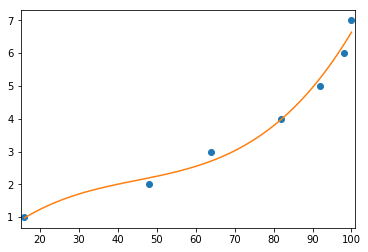

In [237]:


plt.plot(x,y,'o', x_new, y_new)
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.show()

In [238]:
x_new

array([  16.        ,   16.84848485,   17.6969697 ,   18.54545455,
         19.39393939,   20.24242424,   21.09090909,   21.93939394,
         22.78787879,   23.63636364,   24.48484848,   25.33333333,
         26.18181818,   27.03030303,   27.87878788,   28.72727273,
         29.57575758,   30.42424242,   31.27272727,   32.12121212,
         32.96969697,   33.81818182,   34.66666667,   35.51515152,
         36.36363636,   37.21212121,   38.06060606,   38.90909091,
         39.75757576,   40.60606061,   41.45454545,   42.3030303 ,
         43.15151515,   44.        ,   44.84848485,   45.6969697 ,
         46.54545455,   47.39393939,   48.24242424,   49.09090909,
         49.93939394,   50.78787879,   51.63636364,   52.48484848,
         53.33333333,   54.18181818,   55.03030303,   55.87878788,
         56.72727273,   57.57575758,   58.42424242,   59.27272727,
         60.12121212,   60.96969697,   61.81818182,   62.66666667,
         63.51515152,   64.36363636,   65.21212121,   66.06060

In [239]:
y_new

array([ 0.97601293,  1.03542907,  1.09253961,  1.14741444,  1.20012344,
        1.2507365 ,  1.29932349,  1.34595431,  1.39069884,  1.43362696,
        1.47480857,  1.51431354,  1.55221176,  1.58857312,  1.6234675 ,
        1.65696479,  1.68913487,  1.72004763,  1.74977294,  1.77838071,
        1.80594081,  1.83252313,  1.85819754,  1.88303395,  1.90710223,
        1.93047227,  1.95321395,  1.97539717,  1.99709179,  2.01836771,
        2.03929482,  2.059943  ,  2.08038213,  2.10068211,  2.1209128 ,
        2.14114411,  2.16144591,  2.1818881 ,  2.20254055,  2.22347315,
        2.24475578,  2.26645834,  2.2886507 ,  2.31140276,  2.33478439,
        2.35886548,  2.38371592,  2.40940559,  2.43600438,  2.46358218,
        2.49220886,  2.52195431,  2.55288842,  2.58508108,  2.61860216,
        2.65352156,  2.68990915,  2.72783483,  2.76736848,  2.80857998,
        2.85153922,  2.89631609,  2.94298047,  2.99160224,  3.04225129,
        3.09499751,  3.14991077,  3.20706098,  3.266518  ,  3.32

In [245]:
def get_ppp():
    points = np.array([(16, 1), (48, 2), (64, 3), (82, 4),
                       (92, 5), (98, 6), (100, 7)])
    x = points[:, 0]
    y = points[:, 1]
    z = np.polyfit(x, y, 3)
    f = np.poly1d(z)
    x_new = np.linspace(x[0], x[-1], 100)
    y_new = f(x_new)
    return list(y_new)

In [248]:
ppp = get_ppp()

In [252]:
ppp[0]

0.97601292599873202

In [257]:
df['statYardage']

0       0
1       4
2       5
3       3
4      14
5       7
6      23
7       4
8       3
9       5
10      0
11     -5
12      8
13     21
14      0
15      0
16      8
17     32
18     -4
19      1
20     16
21      0
22     12
23      4
24      2
25     13
26      3
27      2
28      4
29      2
30      0
31      0
32      6
33      2
34      4
35      5
36      0
37      7
38     10
39      0
40      0
41     10
42      0
43     -5
44      7
45      7
46      8
47     14
48      1
49     23
50      0
51      1
52      0
53      0
54      1
55      8
56      0
57      3
58      1
59      5
60      0
61      0
62      0
63      5
64      4
65      0
66      3
67      4
68      8
69      3
70      6
71     -7
72      0
73     27
74      7
75     23
76      9
77      0
78      9
79      0
80      0
81     22
82      0
83      0
84     51
85      6
86      6
87     36
88     28
89      8
90      7
91      2
92     35
93      4
94      4
95     12
96      0
97      1
98     10
99      3


In [258]:
def calc_ppp(statYardage, ppp_list):
    if statYardage < 0:
        return - ppp_list[statYardage + 1]
    return ppp_list[statYardage + 1]

In [277]:
df['PPP'] = df.apply(
        lambda row: calc_ppp(row.statYardage), axis=1
    )

In [269]:
df.iloc[11]

FLA_score                                                                0
UGA_score                                                                0
clock                                                                10:00
endDistance                                                             12
endDown                                                                  3
endPossessionText                                                   FLA 12
endYardLine                                                             88
endYardsToEndzone                                                       12
possession                                                             UGA
quarter                                                                  1
scoringPlay                                                          False
startDistance                                                            7
startDown                                                                2
startDownDistanceText    

In [262]:
ppp[5]

1.2507364951118718

In [276]:
def calc_ppp(statYardage):
    ppp_list = get_ppp()
    if statYardage < 0:
        index = abs(statYardage) + 1
        return - ppp_list[index]
    return ppp_list[statYardage + 1]

In [278]:
df['PPP']

0      1.035429
1      1.250736
2      1.299323
3      1.200123
4      1.656965
5      1.390699
6      1.907102
7      1.250736
8      1.200123
9      1.299323
10     1.035429
11    -1.299323
12     1.433627
13     1.858198
14     1.035429
15     1.035429
16     1.433627
17     2.100682
18    -1.250736
19     1.092540
20     1.720048
21     1.035429
22     1.588573
23     1.250736
24     1.147414
25     1.623468
26     1.200123
27     1.147414
28     1.250736
29     1.147414
30     1.035429
31     1.035429
32     1.345954
33     1.147414
34     1.250736
35     1.299323
36     1.035429
37     1.390699
38     1.514314
39     1.035429
40     1.035429
41     1.514314
42     1.035429
43    -1.299323
44     1.390699
45     1.390699
46     1.433627
47     1.656965
48     1.092540
49     1.907102
50     1.035429
51     1.092540
52     1.035429
53     1.035429
54     1.092540
55     1.433627
56     1.035429
57     1.200123
58     1.092540
59     1.299323
60     1.035429
61     1.035429
62     1

In [295]:
df[(df['successPlay'] == True) & (df['garbageBool'] == False) & (df['statYardage'] > 10) & (df['type_abv'] == 'RUSH')]

FLA_score  UGA_score  clock  endDistance  endDown endPossessionText  \
4            0          0  13:00           10        1            FLA 49   
6            0          0  12:20           10        1            FLA 19   
22           0         10   6:00           10        1            FLA 37   
47           0         10  10:12            1        1             UGA 1   
125         14         23  15:00           10        1            FLA 45   
139         17         23   9:35           10        1            FLA 25   
154         17         36   4:29           -1       -1               NaN   

     endYardLine  endYardsToEndzone possession  quarter scoringPlay  \
4             51                 49        UGA        1       False   
6             81                 19        UGA        1       False   
22            63                 63        FLA        1       False   
47             1                  1        FLA        2       False   
125           55                 55        FLA        4       False   
139           75                 25        UGA        4       False   
154          100                  0        UGA        4        True   

     startDistance  startDown startDownDistanceText startPossessionText  \
4               10          1              1st & 10              UGA 37   
6                3          2               2nd & 3              FLA 42   
22              10          1              1st & 10              FLA 25   
47              10          1              1st & 10              UGA 15   
125             10          2              2nd & 10              FLA 25   
139             10          2              2nd & 10              FLA 46   
154              5          3               3rd & 5              FLA 33   

     startYardLine  startYardsToEndzone  statYardage  \
4               37                   63           14   
6               58                   42           23   
22              75                   75           12   
47              15                   15           14   
125             75                   75           20   
139             54                   46           21   
154             67                   33           33   

                                                  text type_abv  \
4    Elijah Holyfield run for 14 yds to the Fla 49 ...     RUSH   
6    D'Andre Swift run for 23 yds to the Fla 19 for...     RUSH   
22   Lamical Perine run for 12 yds to the Fla 37 fo...     RUSH   
47   Jordan Scarlett run for 14 yds to the Geo 1 fo...     RUSH   
125  Feleipe Franks run for 20 yds to the Fla 45 fo...     RUSH   
139  D'Andre Swift run for 21 yds to the Fla 25 for...     RUSH   
154  D'Andre Swift run for 33 yds for a TD, (Rodrig...     RUSH   

             type_text successPlay garbageBool  lineYards  highlightYards  \
4                 Rush        True       False        5.0             9.0   
6                 Rush        True       False        5.0            18.0   
22                Rush        True       False        5.0             7.0   
47                Rush        True       False        5.0             9.0   
125               Rush        True       False        5.0            15.0   
139               Rush        True       False        5.0            16.0   
154  Rushing Touchdown        True       False        5.0            28.0   

    stuffRate downType       PPP  
4       False      STD  1.656965  
6       False      STD  1.907102  
22      False      STD  1.588573  
47      False      STD  1.656965  
125     False     PASS  1.832523  
139     False     PASS  1.858198  
154     False      STD  2.120913

In [284]:
df.PPP

0      1.035429
1      1.250736
2      1.299323
3      1.200123
4      1.656965
5      1.390699
6      1.907102
7      1.250736
8      1.200123
9      1.299323
10     1.035429
11    -1.299323
12     1.433627
13     1.858198
14     1.035429
15     1.035429
16     1.433627
17     2.100682
18    -1.250736
19     1.092540
20     1.720048
21     1.035429
22     1.588573
23     1.250736
24     1.147414
25     1.623468
26     1.200123
27     1.147414
28     1.250736
29     1.147414
30     1.035429
31     1.035429
32     1.345954
33     1.147414
34     1.250736
35     1.299323
36     1.035429
37     1.390699
38     1.514314
39     1.035429
40     1.035429
41     1.514314
42     1.035429
43    -1.299323
44     1.390699
45     1.390699
46     1.433627
47     1.656965
48     1.092540
49     1.907102
50     1.035429
51     1.092540
52     1.035429
53     1.035429
54     1.092540
55     1.433627
56     1.035429
57     1.200123
58     1.092540
59     1.299323
60     1.035429
61     1.035429
62     1

In [307]:
df[(df['successPlay'] == True) & (df['garbageBool'] == False) & (df['statYardage'] > 20) & (df['type_abv'] == 'REC')].groupby('possession')['statYardage'].count().to_frame()



statYardage
possession             
FLA                   1
UGA                   5

In [313]:
print("pass plays > 20 Yards")
display(df[(df['successPlay'] == True) & (df['garbageBool'] == False) & (df['statYardage']
                                                                 > 10) & (df['type_abv'] == 'RUSH')].groupby('possession')['statYardage'].count().to_frame())

pass plays > 20 Yards


statYardage
possession             
FLA                   3
UGA                   4

In [310]:
from IPython.display import display

In [316]:
def frames_to_diplay(df):
    print("-----SUCCESS RATE START ----------")
    print('------OVERALL SUCCESS RATE -------')
    display(df.groupby(['possession', 'quarter'])['successPlay'].apply(
        lambda x: x[x == True].count() / x.count()).to_frame())
    print("------- SUCCESS RATE BY QTR ------------")
    display(df.groupby(['possession', 'quarter'])['successPlay'].apply(
        lambda x: x[x == True].count() / x.count()).to_frame())
    print("----------- SUCCESS RATE BY DOWN ---------------")
    display(df.groupby(['possession', 'downType'])['successPlay'].apply(
        lambda x: x[x == True].count() / x.count()).to_frame())

    print("-----SUCCESS RATE END ----------")
    print("--------EXPLOSIVE PLAYS START ------------")
    print("-------- RUSH PLAYS > 10 YARDS -----------")
    display(df[
        (df['successPlay'] == True) &
        (df['garbageBool'] == False) &
        (df['statYardage'] > 10) &
        (df['type_abv'] == 'RUSH')
    ].groupby('possession')['statYardage'].count().to_frame())

    print("--------- PASS PLAYS > 20 YARDS ---------------")
    display(df[
        (df['successPlay'] == True) &
        (df['garbageBool'] == False) &
        (df['statYardage'] > 20) &
        (df['type_abv'] == 'REC')
    ].groupby('possession')['statYardage'].count().to_frame())

    print("-------- AVG YARDS ON SUC PLAYS ---------------")
    display(df[
        (df['successPlay'] == True) &
        (df['garbageBool'] == False)
    ].groupby('possession')['statYardage'].mean().to_frame())

    print("--------EXPLOSIVE PLAYS END ------------")
    print("---------- LINE YARDS AVG OVERALL --------------")
    display(df[
        (df['successPlay'] == True) &
        (df['type_abv'] == 'RUSH')
    ].groupby(['possession'])['lineYards'].mean().to_frame())

    print("---------- LINE YARDS AVG BY QTR --------------")
    display(df[
        (df['successPlay'] == True) &
        (df['type_abv'] == 'RUSH')
    ].groupby(['possession', 'quarter'])['lineYards'].mean().to_frame())

    print("----------- HIGHLIGHT YARDS AVG OVERALL ------------")
    display(df[
        (df['successPlay'] == True) &
        (df['type_abv'] == 'RUSH')
    ].groupby(['possession'])['highlightYards'].mean().to_frame())

    print("---------- HIGHLIGHT YARDS AVG BY QTR --------------")
    display(df[
        (df['successPlay'] == True) &
        (df['type_abv'] == 'RUSH')
    ].groupby(['possession', 'quarter'])['highlightYards'].mean().to_frame())

In [317]:
frames_to_diplay(df)

-----SUCCESS RATE START ----------
------OVERALL SUCCESS RATE -------


successPlay
possession quarter             
FLA        1           0.461538
           2           0.428571
           3           0.400000
           4           0.285714
UGA        1           0.352941
           2           0.583333
           3           0.333333
           4           0.500000

------- SUCCESS RATE BY QTR ------------


successPlay
possession quarter             
FLA        1           0.461538
           2           0.428571
           3           0.400000
           4           0.285714
UGA        1           0.352941
           2           0.583333
           3           0.333333
           4           0.500000

----------- SUCCESS RATE BY DOWN ---------------


successPlay
possession downType             
FLA        PASS         0.444444
           STD          0.387755
UGA        PASS         0.250000
           STD          0.456140

-----SUCCESS RATE END ----------
--------EXPLOSIVE PLAYS START ------------
-------- RUSH PLAYS > 10 YARDS -----------


statYardage
possession             
FLA                   3
UGA                   4

--------- PASS PLAYS > 20 YARDS ---------------


statYardage
possession             
FLA                   1
UGA                   5

-------- AVG YARDS ON SUC PLAYS ---------------


statYardage
possession             
FLA            9.434783
UGA           13.678571

--------EXPLOSIVE PLAYS END ------------
---------- LINE YARDS AVG OVERALL --------------


lineYards
possession           
FLA          3.735294
UGA          4.321429

---------- LINE YARDS AVG BY QTR --------------


lineYards
possession quarter           
FLA        1         3.125000
           2         3.857143
           3         3.666667
           4         4.333333
UGA        1         4.500000
           2         2.250000
           3         5.000000
           4         4.600000

----------- HIGHLIGHT YARDS AVG OVERALL ------------


highlightYards
possession                
FLA               4.088235
UGA               6.892857

---------- HIGHLIGHT YARDS AVG BY QTR --------------


highlightYards
possession quarter                
FLA        1              3.625000
           2              3.285714
           3              3.666667
           4              7.000000
UGA        1              7.250000
           2              2.250000
           3              3.333333
           4             10.600000

In [319]:
def frames_to_diplay(df):
    print("--------- SUCCESS RATE START ----------")
    print('-------- OVERALL SUCCESS RATE ---------')
    display(
        df[df['garbageBool'] == False].groupby(['possession'])['successPlay'].apply(
        lambda x: x[x == True].count() / x.count()).to_frame()
    )
    print("------- SUCCESS RATE BY QTR ------------")
    display(
        df[df['garbageBool'] == False].groupby(['possession', 'quarter'])['successPlay'].apply(
        lambda x: x[x == True].count() / x.count()).to_frame()
    )
    print("-------- SUCCESS RATE BY DOWN ------------")
    display(
        df[df['garbageBool'] == False].groupby(['possession', 'downType'])['successPlay'].apply(
        lambda x: x[x == True].count() / x.count()).to_frame()
    )

    print("-------- SUCCESS RATE BY PLAY TYPE ------------")
    display(
        df[
            (df['garbageBool'] == False) &
            (df['type_abv'] == "RUSH") |
            (df['type_abv'] == "REC")
        ].groupby(['possession', 'downType'])['successPlay'].apply(
        lambda x: x[x == True].count() / x.count()).to_frame()
    )

    print("-----------SUCCESS RATE END ----------")
    print("--------EXPLOSIVE PLAYS START ------------")
    print("-------- RUSH PLAYS > 10 YARDS -----------")
    display(
        df[
            (df['successPlay'] == True) &
            (df['garbageBool'] == False) &
            (df['statYardage'] > 10) &
            (df['type_abv'] == 'RUSH')
        ].groupby('possession')['statYardage'].count().to_frame()
    )

    print("--------- PASS PLAYS > 20 YARDS ---------------")
    display(
        df[
            (df['successPlay'] == True) &
            (df['garbageBool'] == False) &
            (df['statYardage'] > 20) &
            (df['type_abv'] == 'REC')
        ].groupby('possession')['statYardage'].count().to_frame()
    )

    print("-------- AVG YARDS ON SUC PLAYS ---------------")
    display(
        df[
            (df['successPlay'] == True) &
            (df['garbageBool'] == False)
        ].groupby('possession')['statYardage'].mean().to_frame()
    )

    print("--------EXPLOSIVE PLAYS END ------------")
    print("---------- LINE YARDS AVG OVERALL --------------")
    display(
        df[
            (df['successPlay'] == True) &
            (df['type_abv'] == 'RUSH')
        ].groupby(['possession'])['lineYards'].mean().to_frame()
    )

    print("---------- LINE YARDS AVG BY QTR --------------")
    display(
        df[
            (df['successPlay'] == True) &
            (df['type_abv'] == 'RUSH')
        ].groupby(['possession', 'quarter'])['lineYards'].mean().to_frame()
    )

    print("----------- HIGHLIGHT YARDS AVG OVERALL ------------")
    display(
        df[
            (df['successPlay'] == True) &
            (df['type_abv'] == 'RUSH')
        ].groupby(['possession'])['highlightYards'].mean().to_frame()
    )

    print("---------- HIGHLIGHT YARDS AVG BY QTR --------------")
    display(
        df[
            (df['successPlay'] == True) &
            (df['type_abv'] == 'RUSH')
        ].groupby(['possession', 'quarter'])['highlightYards'].mean().to_frame()
    )


In [321]:
frames_to_diplay(df)

--------- SUCCESS RATE START ----------
-------- OVERALL SUCCESS RATE ---------


successPlay
possession             
FLA            0.396552
UGA            0.430769

------- SUCCESS RATE BY QTR ------------


successPlay
possession quarter             
FLA        1           0.461538
           2           0.428571
           3           0.400000
           4           0.285714
UGA        1           0.352941
           2           0.583333
           3           0.333333
           4           0.500000

-------- SUCCESS RATE BY DOWN ------------


successPlay
possession downType             
FLA        PASS         0.444444
           STD          0.387755
UGA        PASS         0.250000
           STD          0.456140

-------- SUCCESS RATE BY PLAY TYPE ------------


successPlay
possession downType             
FLA        PASS         0.571429
           STD          0.487179
UGA        PASS         0.285714
           STD          0.520000

-----------SUCCESS RATE END ----------
--------EXPLOSIVE PLAYS START ------------
-------- RUSH PLAYS > 10 YARDS -----------


statYardage
possession             
FLA                   3
UGA                   4

--------- PASS PLAYS > 20 YARDS ---------------


statYardage
possession             
FLA                   1
UGA                   5

-------- AVG YARDS ON SUC PLAYS ---------------


statYardage
possession             
FLA            9.434783
UGA           13.678571

--------EXPLOSIVE PLAYS END ------------
---------- LINE YARDS AVG OVERALL --------------


lineYards
possession           
FLA          3.735294
UGA          4.321429

---------- LINE YARDS AVG BY QTR --------------


lineYards
possession quarter           
FLA        1         3.125000
           2         3.857143
           3         3.666667
           4         4.333333
UGA        1         4.500000
           2         2.250000
           3         5.000000
           4         4.600000

----------- HIGHLIGHT YARDS AVG OVERALL ------------


highlightYards
possession                
FLA               4.088235
UGA               6.892857

---------- HIGHLIGHT YARDS AVG BY QTR --------------


highlightYards
possession quarter                
FLA        1              3.625000
           2              3.285714
           3              3.666667
           4              7.000000
UGA        1              7.250000
           2              2.250000
           3              3.333333
           4             10.600000

In [323]:
display(
        df[df['garbageBool'] == False].groupby(['possession', 'quarter', 'startDown'])['successPlay'].apply(
        lambda x: x[x == True].count() / x.count()).to_frame()
    )

/Users/joshhiggins/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()


successPlay
possession quarter startDown             
FLA        1       0                  NaN
                   1             0.500000
                   2             0.250000
                   3             0.666667
                   4                  NaN
           2       1             0.333333
                   2             0.571429
                   3             0.400000
                   4                  NaN
           3       0                  NaN
                   1             0.333333
                   2             0.666667
                   3             0.000000
                   4                  NaN
           4       1             0.400000
                   2             0.400000
                   3             0.000000
                   4             0.000000
UGA        1       1             0.285714
                   2             0.333333
                   3             0.500000
                   4                  NaN
           2       0                  NaN
                   1             0.666667
                   2             0.750000
                   3             0.000000
                   4                  NaN
           3       1             0.285714
                   2             0.285714
                   3             0.500000
                   4                  NaN
           4       0                  NaN
                   1             0.375000
                   2             0.333333
                   3             1.000000
                   4                  NaN

In [325]:
display(
        df[
            (df['garbageBool'] == False) &
            (df['startDown'] > 0) &
            (df['startDown'] < 4)
        ].groupby(['possession', 'quarter', 'startDown'])['successPlay'].apply(
        lambda x: x[x == True].count() / x.count()).to_frame()
    )

successPlay
possession quarter startDown             
FLA        1       1             0.500000
                   2             0.250000
                   3             0.666667
           2       1             0.333333
                   2             0.571429
                   3             0.400000
           3       1             0.333333
                   2             0.666667
                   3             0.000000
           4       1             0.400000
                   2             0.400000
                   3             0.000000
UGA        1       1             0.285714
                   2             0.333333
                   3             0.500000
           2       1             0.666667
                   2             0.750000
                   3             0.000000
           3       1             0.285714
                   2             0.285714
                   3             0.500000
           4       1             0.375000
                   2             0.333333
                   3             1.000000